In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import json

from sklearn.cluster import KMeans

from wordcloud import WordCloud

from collections import Counter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **A. Dataset Understanding**

## **I. Import Dataset**

* **Parquet File**

In [ ]:
parquet_file = '/content/drive/MyDrive/Data Scientist - Take Home Test/Data/youtube-videos.parquet'
youtube_videos = pd.read_parquet(parquet_file, engine='auto')

* **Json File**

In [ ]:
with open('/content/drive/MyDrive/Data Scientist - Take Home Test/Data/youtube-categories.json', 'r') as read_file:
  json = json.load(read_file)

In [ ]:
id = []
title = []
channel_id = []
for i, j in enumerate(json):
  id_ = j['id']
  title_ = j['snippet']['title']
  channelId_ = j['snippet']['channelId']
  id.append(id_)
  title.append(title_)
  channel_id.append(channelId_)

youtube_categories = pd.DataFrame()
youtube_categories['id'] = id
youtube_categories['title'] = title
youtube_categories['channel_id'] = channel_id

## **II. Check & Change Data Type**

* **Youtube Videos**

In [ ]:
youtube_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [ ]:
youtube_videos.head(2)

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   

                                               title    channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE     CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...  LastWeekTonight   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   

                                                tags    views  likes  \
0                                    SHANtell martin   748374  57527   
1  last week tonight trump presidency|"last week ...  2418783  97185   

   dislikes  comment_count                                  thumbnail_link  \
0      2966          15954  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
1      6146          12703  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   

                                         description  
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...  
1  One year after the presidential election, John...

* **Json File**

In [ ]:
youtube_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          32 non-null     object
 1   title       32 non-null     object
 2   channel_id  32 non-null     object
dtypes: object(3)
memory usage: 896.0+ bytes


In [ ]:
youtube_categories.head(2)

id             title                channel_id
0  1  Film & Animation  UCBR8-60-B28hp2BmDPdntcQ
1  2  Autos & Vehicles  UCBR8-60-B28hp2BmDPdntcQ

**Observation:**

1. From *youtube_videos* dataframe there are has an incorrect data type, such as `trending_date` , `category_id` , and `publish_time`.

2. From *youtube_categories* dataframe there are not has an incorrect data type.

* **Change Data Type**

In [ ]:
youtube_videos['trending_date'] = pd.to_datetime(youtube_videos['trending_date'].astype(str), format="%y.%d.%m")
youtube_videos['category_id'] = youtube_videos['category_id'].astype(str)
youtube_videos['publish_time'] = pd.to_datetime(youtube_videos['publish_time'])

for k in ['comments_disabled','ratings_disabled','video_error_or_removed']:
  youtube_videos[k] = youtube_videos[k].astype(int)

* **Merge Data**

In [ ]:
df = youtube_videos.merge(youtube_categories, left_on='category_id', right_on='id')

* **Tidy Up Some Columns**

In [ ]:
df = df.rename(columns = {'title_x':'video_title', 'title_y':'category_title'})
df = df.drop(['id','thumbnail_link','video_error_or_removed'], axis=1)

* **Checking the Final Result of Changing Columns and Data Type**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   video_id           40949 non-null  object             
 1   trending_date      40949 non-null  datetime64[ns]     
 2   video_title        40949 non-null  object             
 3   channel_title      40949 non-null  object             
 4   category_id        40949 non-null  object             
 5   publish_time       40949 non-null  datetime64[ns, UTC]
 6   tags               40949 non-null  object             
 7   views              40949 non-null  int64              
 8   likes              40949 non-null  int64              
 9   dislikes           40949 non-null  int64              
 10  comment_count      40949 non-null  int64              
 11  comments_disabled  40949 non-null  int64              
 12  ratings_disabled   40949 non-null  int64      

In [ ]:
df.head(2)

video_id trending_date                         video_title  \
0  2kyS6SvSYSE    2017-11-14  WE WANT TO TALK ABOUT OUR MARRIAGE   
1  0mlNzVSJrT0    2017-11-14                Me-O Cats Commercial   

  channel_title category_id              publish_time  \
0  CaseyNeistat          22 2017-11-13 17:13:01+00:00   
1       Nobrand          22 2017-04-21 06:47:32+00:00   

                        tags   views  likes  dislikes  comment_count  \
0            SHANtell martin  748374  57527      2966          15954   
1  cute|"cats"|"thai"|"eggs"   98966   2486       184            532   

   comments_disabled  ratings_disabled  \
0                  0                 0   
1                  0                 0   

                                         description  category_title  \
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...  People & Blogs   
1  Kittens come out of the eggs in a Thai commerc...  People & Blogs   

                 channel_id  
0  UCBR8-60-B28hp2BmDPdntcQ  
1  UCBR8-60-B28hp2BmDPdntcQ

## **III. Check & Handling Missing Value(s)**

In [ ]:
data_null = df.isnull().sum().reset_index()
data_null.columns = ['feature','missing_value']
data_null['percentage'] = round((data_null['missing_value']/len(df))*100,2)
data_null = data_null.sort_values('percentage', ascending=False).reset_index(drop=True)
data_null = data_null[data_null['percentage']>0]
data_null

feature  missing_value  percentage
0  description            570        1.39

**Observation:**

There are 570 rows of missing values ​​in column description or 1.39% of the total data. For now, missing data will be retained.

## **IV. Check & Handling Duplicated Value(s)**

In [ ]:
print('Total of data duplicated :', df.duplicated().sum(), '\n')
df[df.duplicated(keep=False)].sort_values('video_id')

Total of data duplicated : 48 



video_id trending_date  \
11588  1RZYOeQeIXE    2018-05-15   
11546  1RZYOeQeIXE    2018-05-15   
23608  1U1u5aKU3AY    2018-05-15   
23617  1U1u5aKU3AY    2018-05-15   
31213  2PH7dK6SLC8    2018-05-15   
...            ...           ...   
11545  xhs8tf1v__w    2018-05-15   
11605  y_WoOYybCro    2018-05-15   
11563  y_WoOYybCro    2018-05-15   
16134  zcEE8J2Bqa8    2018-05-15   
16124  zcEE8J2Bqa8    2018-05-15   

                                             video_title  channel_title  \
11588   Sarah Paulson Gets Scared During '5 Second Rule'   TheEllenShow   
11546   Sarah Paulson Gets Scared During '5 Second Rule'   TheEllenShow   
23608  New lava fissures fuel fears of eruption in Ha...            CNN   
23617  New lava fissures fuel fears of eruption in Ha...            CNN   
31213                             John Mayer - New Light  johnmayerVEVO   
...                                                  ...            ...   
11545  Terry Crews Answers the Web's Most Searched Qu...          WIRED   
11605  How I Became The Fresh Prince of Bel-Air | STO...     Will Smith   
11563  How I Became The Fresh Prince of Bel-Air | STO...     Will Smith   
16134                         The Goblin - JACK AND DEAN  Jack and Dean   
16124                         The Goblin - JACK AND DEAN  Jack and Dean   

      category_id              publish_time  \
11588          24 2018-05-14 13:00:00+00:00   
11546          24 2018-05-14 13:00:00+00:00   
23608          25 2018-05-13 19:30:53+00:00   
23617          25 2018-05-13 19:30:53+00:00   
31213          10 2018-05-10 17:00:01+00:00   
...           ...                       ...   
11545          24 2018-05-14 16:00:29+00:00   
11605          24 2018-05-10 16:08:58+00:00   
11563          24 2018-05-10 16:08:58+00:00   
16134          23 2018-05-11 18:27:01+00:00   
16124          23 2018-05-11 18:27:01+00:00   

                                                    tags    views   likes  \
11588  ellen|"ellen degeneres"|"the ellen show"|"seas...   704786   19880   
11546  ellen|"ellen degeneres"|"the ellen show"|"seas...   704786   19880   
23608  latest News|"Happening Now"|"CNN"|"lava"|"hawa...   241387    1488   
23617  latest News|"Happening Now"|"CNN"|"lava"|"hawa...   241387    1488   
31213  John|"Mayer"|"New"|"Light"|"Snack"|"Money"|"Po...  1201548   51670   
...                                                  ...      ...     ...   
11545  autocomplete|"deadpool 2"|"google autocomplete...   343967   16988   
11605  comedy|"entertainment"|"will smith"|"will"|"sm...  2055638  120377   
11563  comedy|"entertainment"|"will smith"|"will"|"sm...  2055638  120377   
16134  Jack and Dean|"OMFGItsJackAndDean"|"Jack Howar...   165617   20572   
16124  Jack and Dean|"OMFGItsJackAndDean"|"Jack Howar...   165617   20572   

       dislikes  comment_count  comments_disabled  ratings_disabled  \
11588       248            669                  0                 0   
11546       248            669                  0                 0   
23608       251           1087                  0                 0   
23617       251           1087                  0                 0   
31213       964           4264                  0                 0   
...         ...            ...                ...               ...   
11545       132           1308                  0                 0   
11605       752           4872                  0                 0   
11563       752           4872                  0                 0   
16134       140           1407                  0                 0   
16124       140           1407                  0                 0   

                                             description   category_title  \
11588  Sarah Paulson agreed to play a friendly game o...    Entertainment   
11546  Sarah Paulson agreed to play a friendly game o...    Entertainment   
23608  Three new fissures have opened on Hawaii's Big...  News & Politics   
23617  Three new fissures

**Observation:**

There are 48 lines indicated as duplicated.

In [ ]:
df = df.drop_duplicates()

# **B. Data Analysis**

In [ ]:
nums = [col for col in df.columns if (str(df[col].dtype) != 'object') and col not in ['comments_disabled','ratings_disabled','trending_date','publish_time']]
cats = [col for col in df.columns if (str(df[col].dtype) == 'object')]

## **I. Numerical Features**

* **Distribution**

In [ ]:
df[nums].describe().T

count          mean           std    min       25%       50%  \
views          40901.0  2.360678e+06  7.397719e+06  549.0  241972.0  681064.0   
likes          40901.0  7.427173e+04  2.289999e+05    0.0    5416.0   18069.0   
dislikes       40901.0  3.711722e+03  2.904624e+04    0.0     202.0     630.0   
comment_count  40901.0  8.448567e+03  3.745139e+04    0.0     613.0    1855.0   

                     75%          max  
views          1821926.0  225211923.0  
likes            55338.0    5613827.0  
dislikes          1936.0    1674420.0  
comment_count     5752.0    1361580.0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

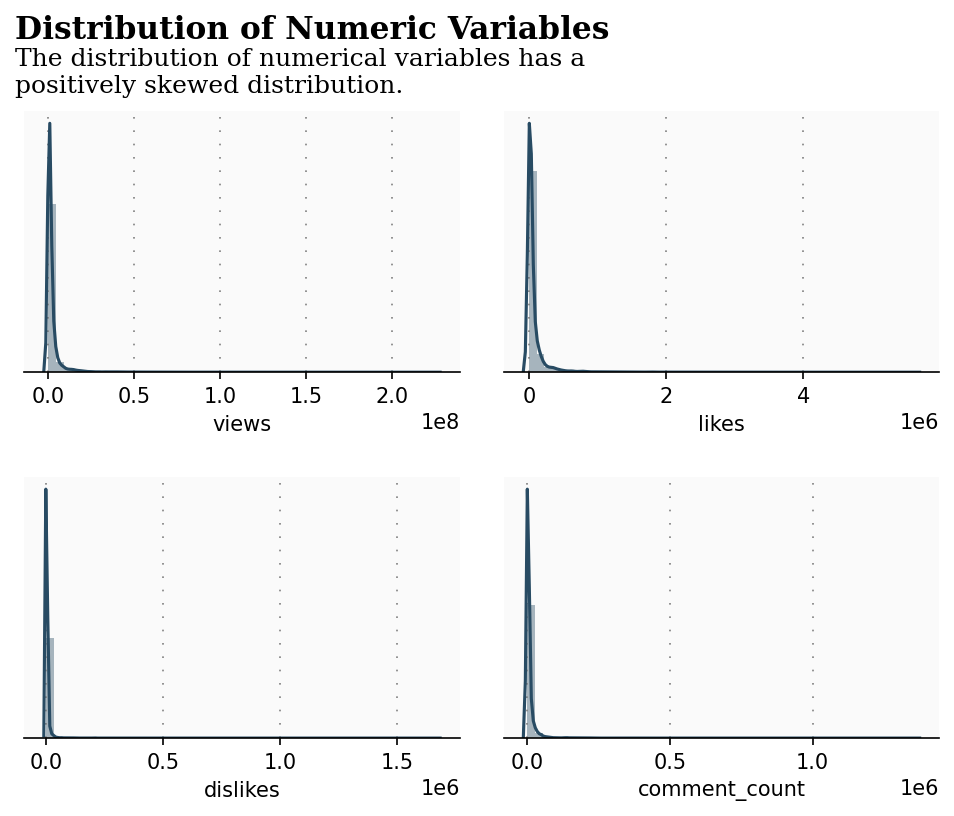

In [ ]:
fig = plt.figure(figsize=(12, 12), dpi=150)
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)

plot = 0
for row in range(0, 2):
    for col in range(0, 2):
        locals()['ax'+str(plot)] = fig.add_subplot(gs[row, col])
        locals()['ax'+str(plot)].set_facecolor('#fafafa')
        locals()['ax'+str(plot)].tick_params(axis='y', left=False)
        locals()['ax'+str(plot)].get_yaxis().set_visible(False)
        for s in ['top','right','left']:
            locals()['ax'+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0
for variable in nums:
        sns.distplot(df[variable], ax=locals()['ax'+str(plot)], color='#284B63')
        locals()['ax'+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,7))
        plot += 1

fig.text(.12, .92, 'Distribution of Numeric Variables', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(.12, .89, 'The distribution of numerical variables has a\npositively skewed distribution.', fontsize=12, fontweight='light', fontfamily='serif')

#plt.savefig('Distribution of Numeric Variables_1.png', bbox_inches='tight')
plt.show()

* **Date**

In [ ]:
df[['trending_date','publish_time']].describe().T

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count unique                        top freq  \
trending_date  40901    205        2017-11-14 00:00:00  200   
publish_time   40901   6269  2018-05-18 14:00:04+00:00   50   

                                   first                       last  
trending_date        2017-11-14 00:00:00        2018-06-14 00:00:00  
publish_time   2006-07-23 08:24:11+00:00  2018-06-14 01:31:53+00:00

* **Comments Disabled**

In [ ]:
comments_disabled	= df.groupby(['comments_disabled'])[['video_id']].count().reset_index()
comments_disabled['percentage'] = round(comments_disabled['video_id'] / comments_disabled['video_id'].sum() * 100, 2)

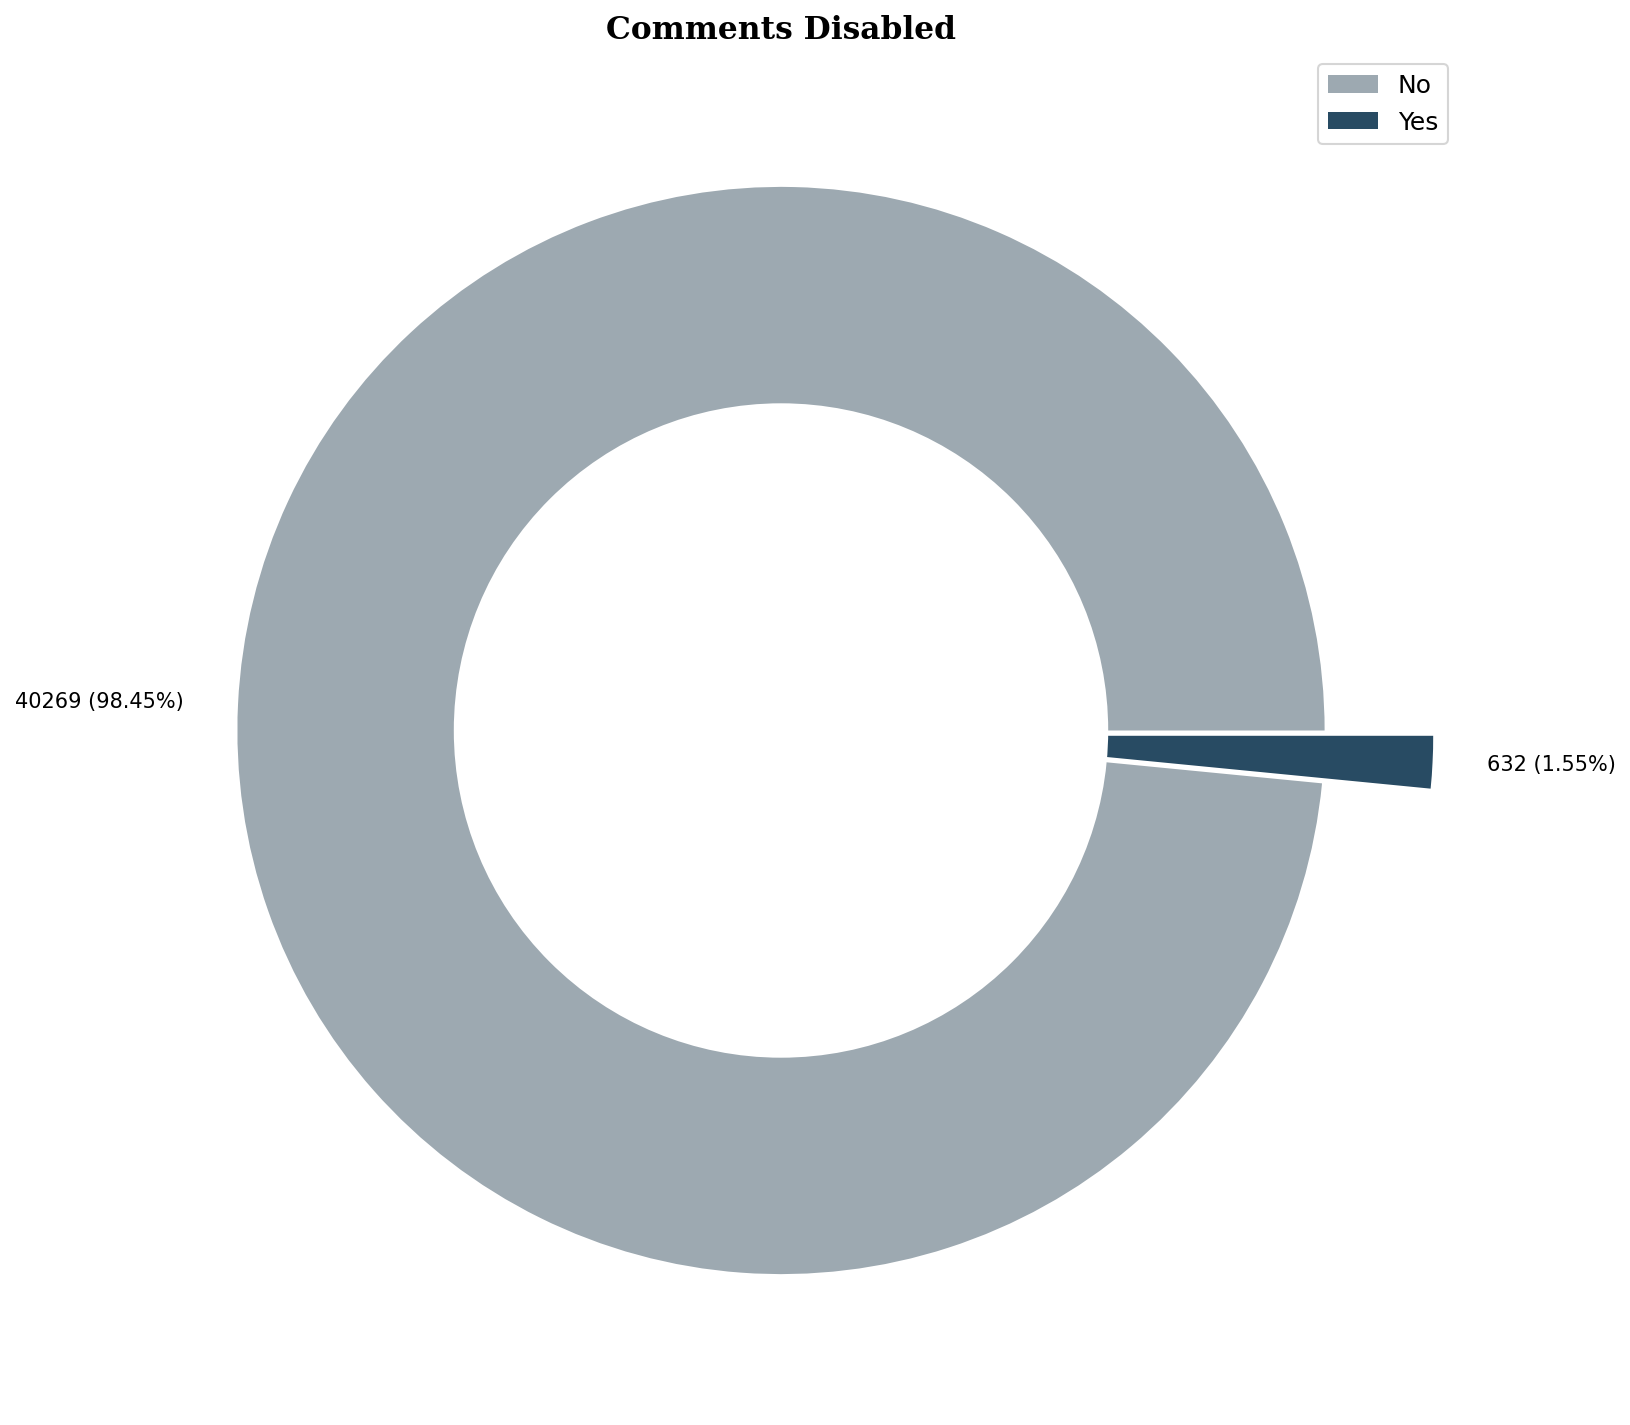

In [ ]:
fig = plt.figure(figsize=(12, 12), dpi=150)

explode = np.zeros(len(comments_disabled))
explode[1] = 0.2
explode = tuple(explode)
plt.pie(comments_disabled['percentage'], explode = explode, labels = [f'{j} ({i}%)' for i,j in zip(list(comments_disabled['percentage']),list(comments_disabled['video_id']))], colors=['#9DA9B1','#284B63'])
circle = plt.Circle( (0,0), 0.6, color='white')
p = plt.gcf()
p.gca().add_artist(circle)
plt.title('Comments Disabled', fontsize=15, fontweight='bold', fontfamily='serif')
plt.legend(labels=['No','Yes'], fontsize=12)

#plt.savefig('Comments Disabled.png', bbox_inches='tight')
plt.show()

* **ratings_disabled**

In [ ]:
ratings_disabled	= df.groupby(['ratings_disabled'])[['video_id']].count().reset_index()
ratings_disabled['percentage'] = round(ratings_disabled['video_id'] / ratings_disabled['video_id'].sum() * 100, 2)

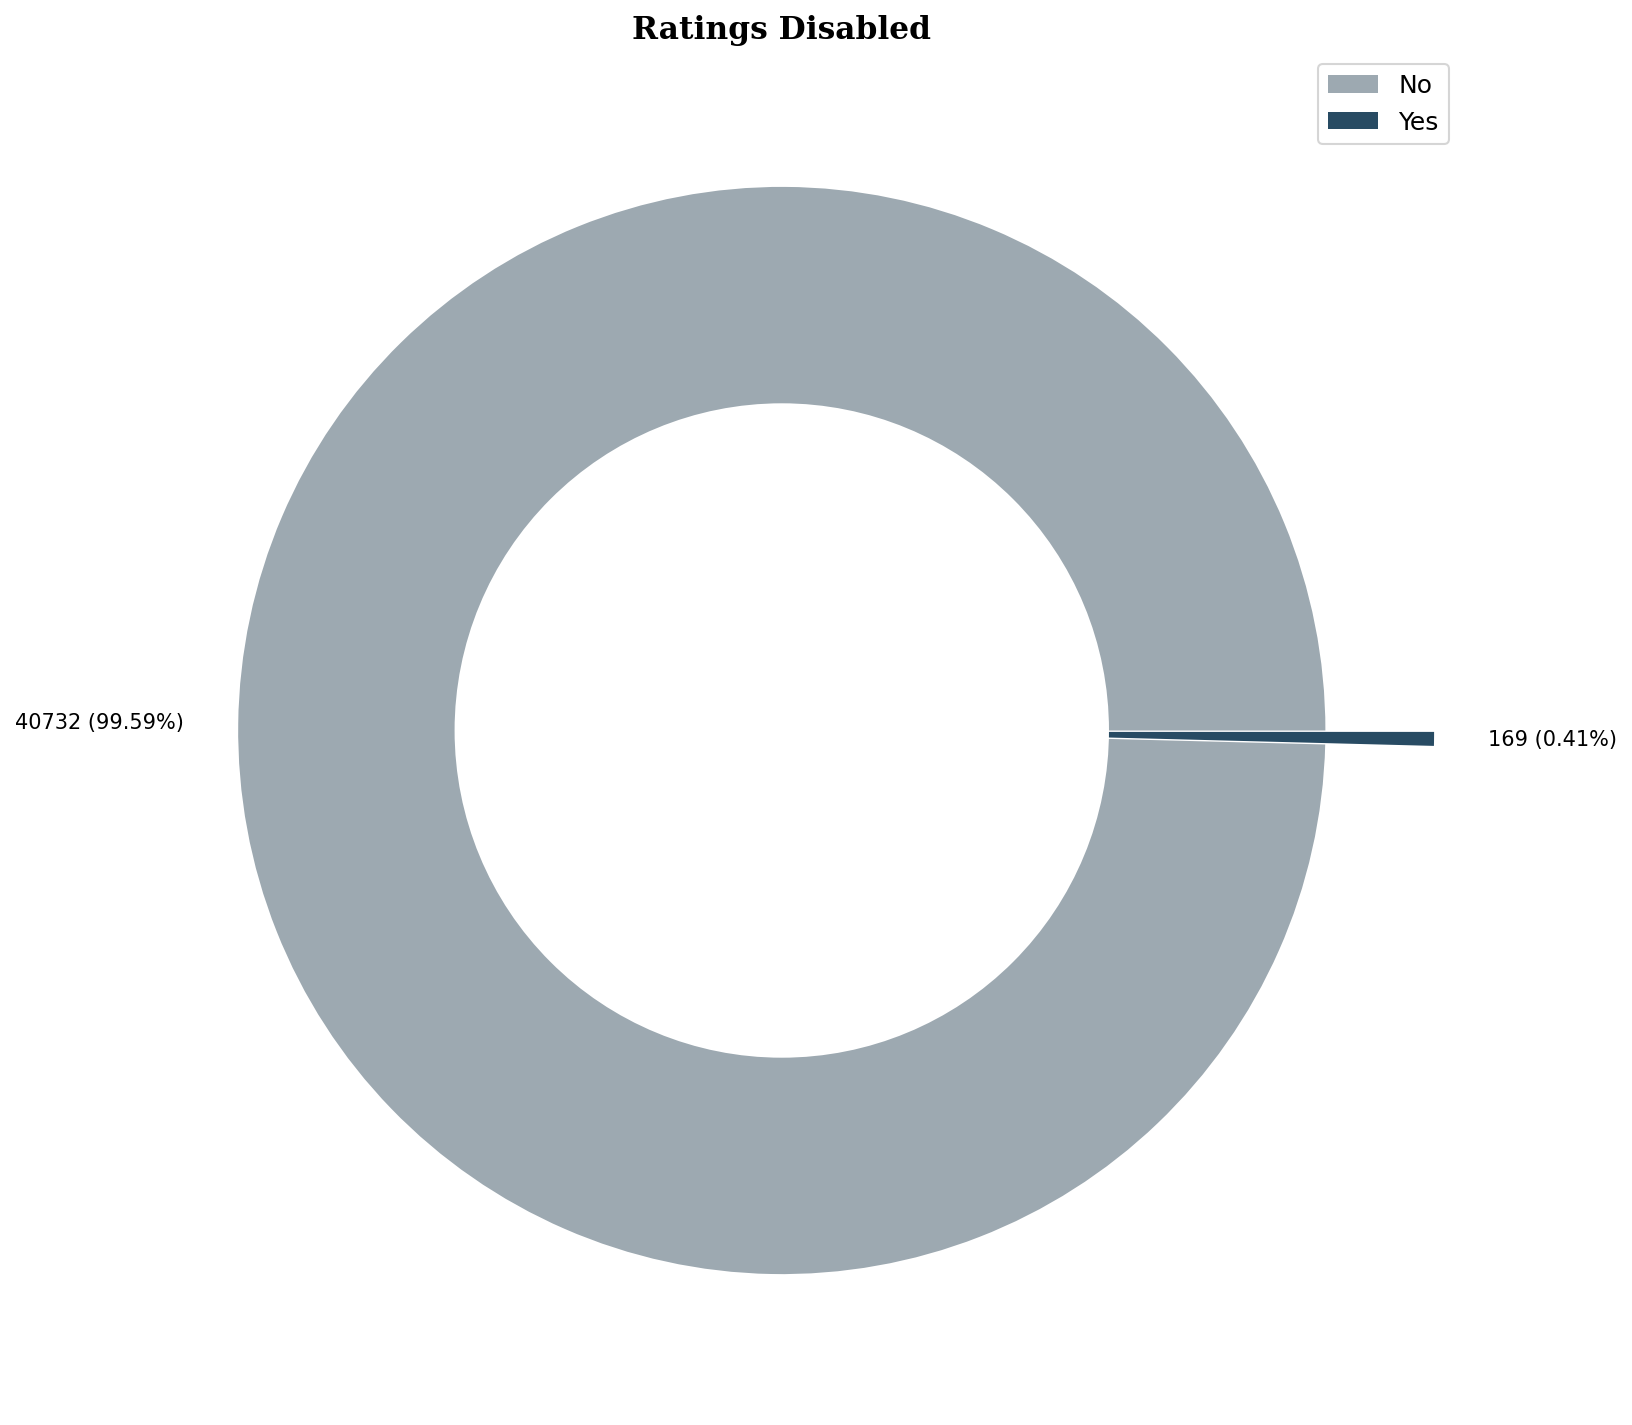

In [ ]:
fig = plt.figure(figsize=(12, 12), dpi=150)

explode = np.zeros(len(ratings_disabled))
explode[1] = 0.2
explode = tuple(explode)
plt.pie(ratings_disabled['percentage'], explode = explode, labels = [f'{j} ({i}%)' for i,j in zip(list(ratings_disabled['percentage']),list(ratings_disabled['video_id']))], colors=['#9DA9B1','#284B63'])
circle = plt.Circle( (0,0), 0.6, color='white')
p = plt.gcf()
p.gca().add_artist(circle)
plt.title('Ratings Disabled', fontsize=15, fontweight='bold', fontfamily='serif')
plt.legend(labels=['No','Yes'], fontsize=12)

#plt.savefig('Ratings Disabled.png', bbox_inches='tight')
plt.show()

## **II. Categorical Features**

In [ ]:
df[cats].describe().T

count unique  \
video_id        40901   6351   
video_title     40901   6455   
channel_title   40901   2207   
category_id     40901     16   
tags            40901   6055   
description     40332   6901   
category_title  40901     16   
channel_id      40901      1   

                                                              top   freq  
video_id                                              j4KvrAUjn6c     29  
video_title     Mission: Impossible - Fallout (2018) - Officia...     29  
channel_title                                                ESPN    202  
category_id                                                    24   9944  
tags                                                       [none]   1534  
description     ► Listen LIVE: http://power1051fm.com/\n► Face...     58  
category_title                                      Entertainment   9944  
channel_id                               UCBR8-60-B28hp2BmDPdntcQ  40901

## **III. Percentage of Videos Trending by Title Category**

In [ ]:
category_title = df.groupby(['category_title'])[['video_id']].count().sort_values('video_id', ascending=False).reset_index()
category_title['percentage'] = round(category_title['video_id'] / category_title['video_id'].sum() * 100, 2)

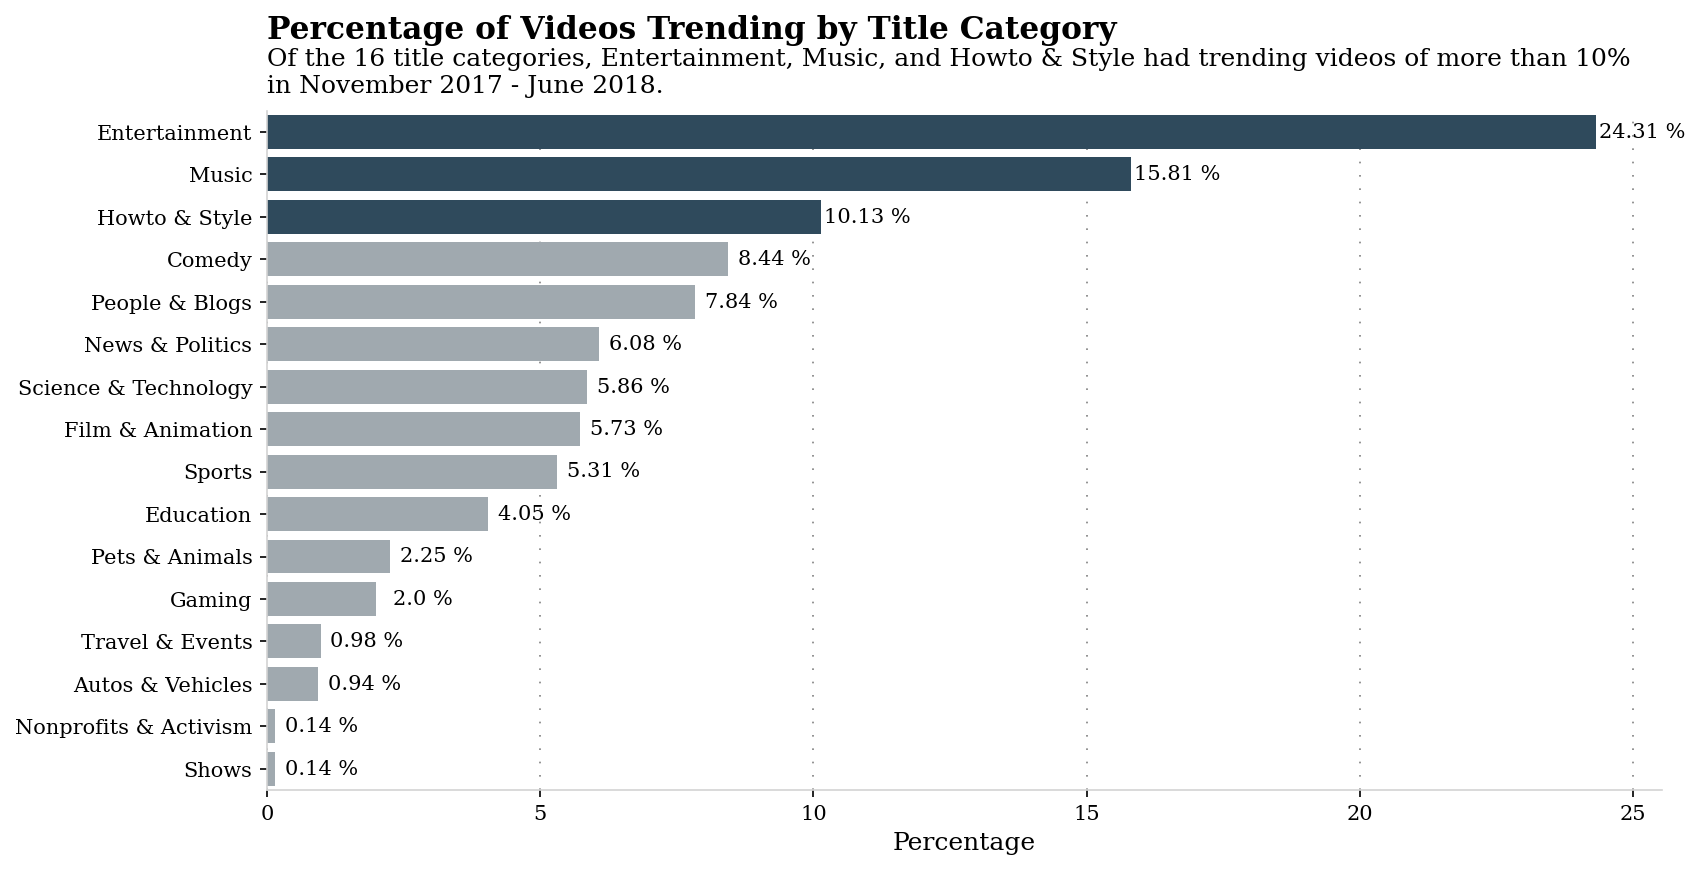

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12, 6), dpi=150)

color_map = ['#9DA9B1' for _ in range(16)]
for cm in range(3):
  color_map[cm] = '#284B63' 

sns.barplot(x='percentage', y='category_title', data=category_title, palette=color_map)

for i, j in category_title.iterrows():
  ax.annotate(f"{j['percentage']} %", xy=(j['percentage']+.85, i), va = 'center', ha='center',fontweight='light', fontfamily='serif')

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

for t in ['left', 'bottom']:
    ax.spines[t].set_color('lightgray')

ax.grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,7))

xticklabels = np.arange(0, 26, 5)
yticklabels = category_title['category_title']
ax.set_xticklabels(xticklabels, fontfamily='serif', rotation=0)
ax.set_yticklabels(yticklabels, fontfamily='serif', rotation=0)
ax.set_axisbelow(True)

plt.xlabel('Percentage', fontsize=12, fontweight='light', fontfamily='serif')
plt.ylabel('')

fig.text(.125, .96, 'Percentage of Videos Trending by Title Category', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(.125, .9, 'Of the 16 title categories, Entertainment, Music, and Howto & Style had trending videos of more than 10%\nin November 2017 - June 2018.', fontsize=12, fontweight='light', fontfamily='serif')

#median = category_title['video_id'].median()
#ax.axvline(median, color='black', linewidth=.5, linestyle='dashdot')
#ax.annotate(f"median : {round(median)}", 
#            xy=(median+650, 9.5),
#            va = 'center', ha='center',
#            color='#4a4a4a',
#            bbox=dict(boxstyle='round', pad=0.4, facecolor='#efe8d1', linewidth=0))

#plt.savefig('Percentage of Videos Trending by Title Category.png', bbox_inches='tight')
plt.show()

## **IV. Percentage of Videos Trending by Channel**

In [ ]:
channel = df.groupby(['channel_title','category_title'])[['video_id']].count().sort_values('video_id', ascending=False).reset_index()
channel['percentage'] = round(channel['video_id'] / channel['video_id'].sum() * 100, 3)
channel = channel.head(15)

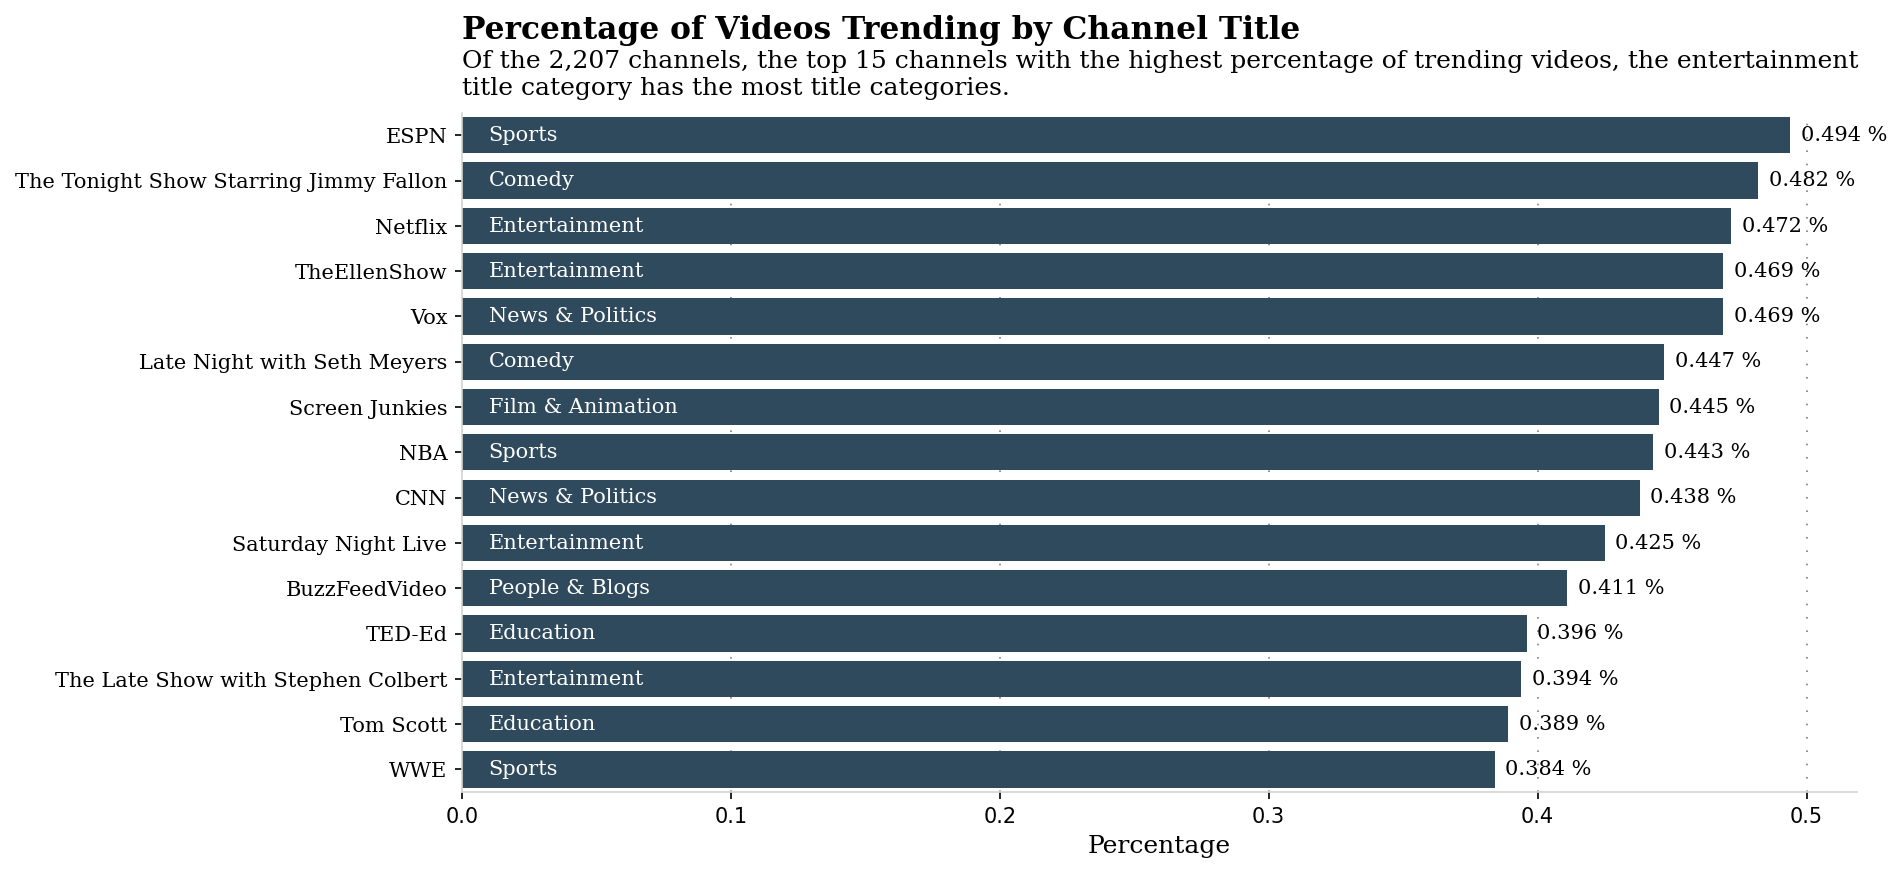

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12, 6), dpi=150)

color_map = ['#284B63' for _ in range(16)]

sns.barplot(x='percentage', y='channel_title', data=channel, palette=color_map)

for i, j in channel.iterrows():
  ax.annotate(f"{j['percentage']} %", xy=(j['percentage']+.02, i), va = 'center', ha='center',fontweight='light', fontfamily='serif')
  ax.annotate(f"{j['category_title']}", xy=(.01, i), va = 'center', ha='left',fontweight='light', fontfamily='serif', color='w')

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

for t in ['left', 'bottom']:
    ax.spines[t].set_color('lightgray')

ax.grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,7))

#xticklabels = np.arange(0, 0.6, .1)
yticklabels = channel['channel_title']
#ax.set_xticklabels(xticklabels, fontfamily='serif', rotation=0)
ax.set_yticklabels(yticklabels, fontfamily='serif', rotation=0)
ax.set_axisbelow(True)

plt.xlabel('Percentage', fontsize=12, fontweight='light', fontfamily='serif')
plt.ylabel('')

fig.text(.125, .962, 'Percentage of Videos Trending by Channel Title', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(.125, .9, 'Of the 2,207 channels, the top 15 channels with the highest percentage of trending videos, the entertainment\ntitle category has the most title categories.', fontsize=12, fontweight='light', fontfamily='serif')

#plt.savefig('Percentage of Videos Trending by Channel Title.png', bbox_inches='tight')
plt.show()

## **V. Correlation**

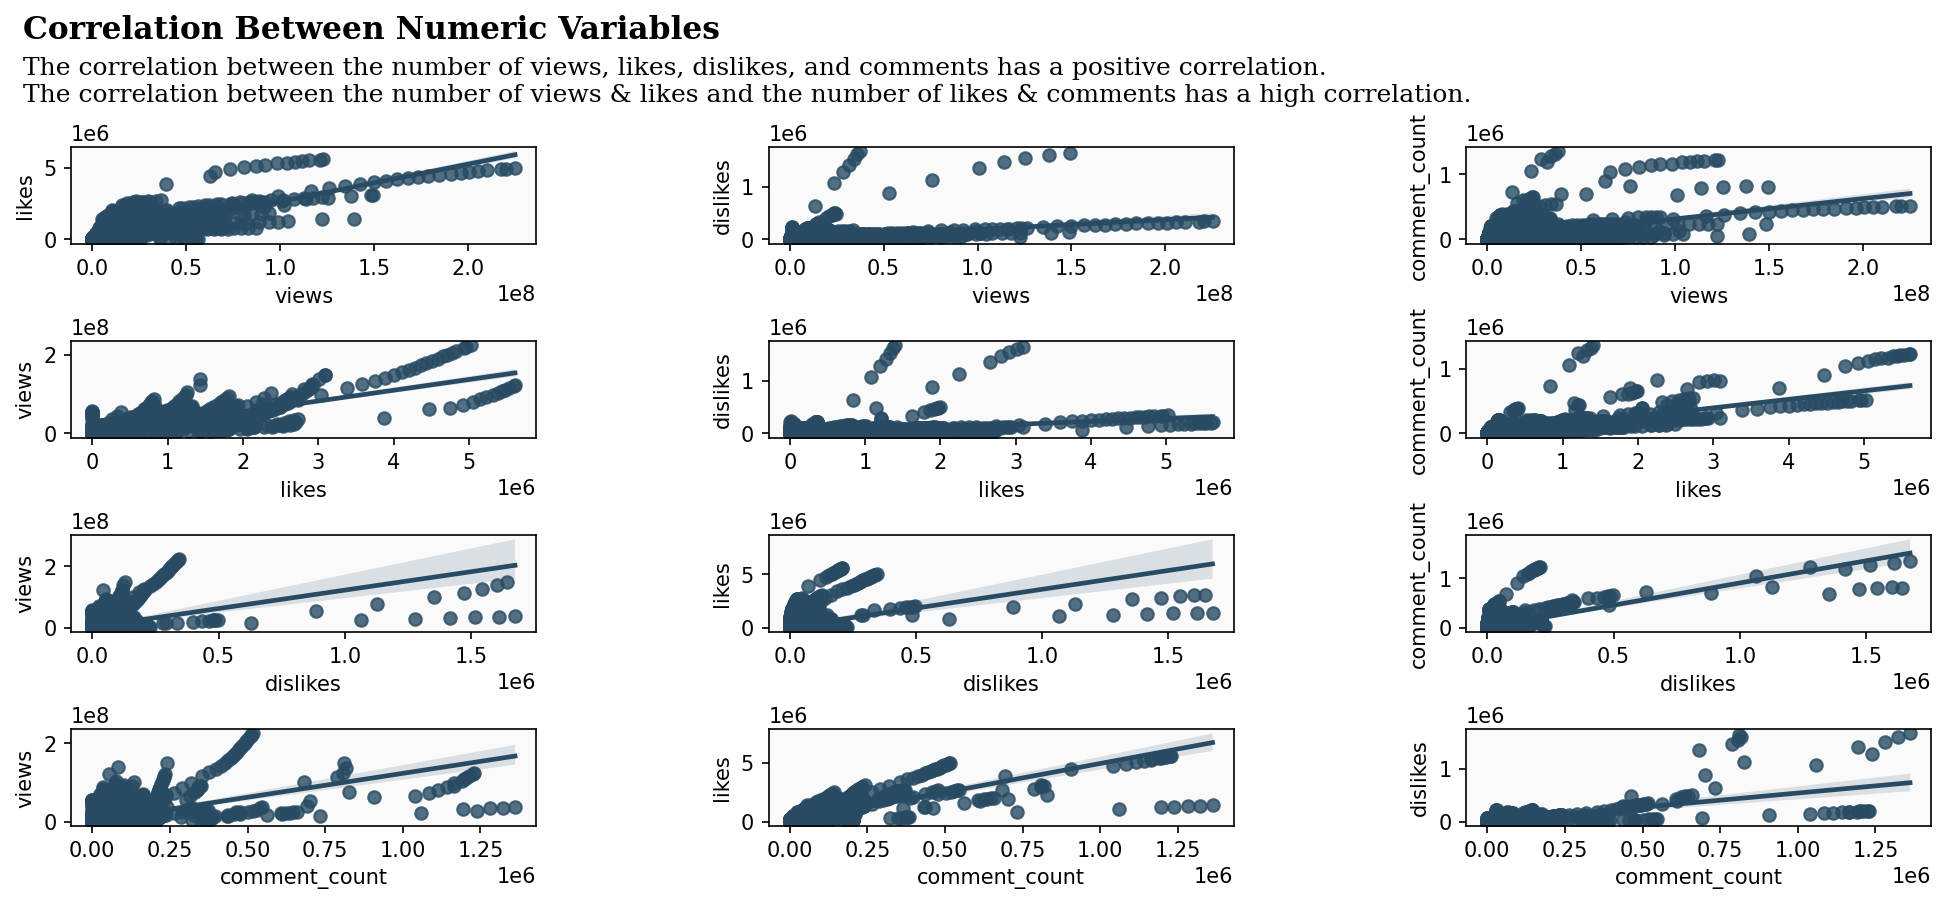

In [ ]:
fig = plt.figure(figsize=(16, 6), dpi=150)

fig.text(0.105, 1, 'Correlation Between Numeric Variables', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.105, .93, 'The correlation between the number of views, likes, dislikes, and comments has a positive correlation.\nThe correlation between the number of views & likes and the number of likes & comments has a high correlation.', fontsize=12, fontweight='light', fontfamily='serif')

n = 0 
for x in nums:
    for y in nums:
        if x==y:
          continue
        n += 1
        plt.subplot(4 , 3, n)
        plt.subplots_adjust(hspace = 1 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df, color='#284B63', fit_reg=True).set_facecolor("#fafafa")

#plt.savefig('Correlation.png', bbox_inches='tight')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


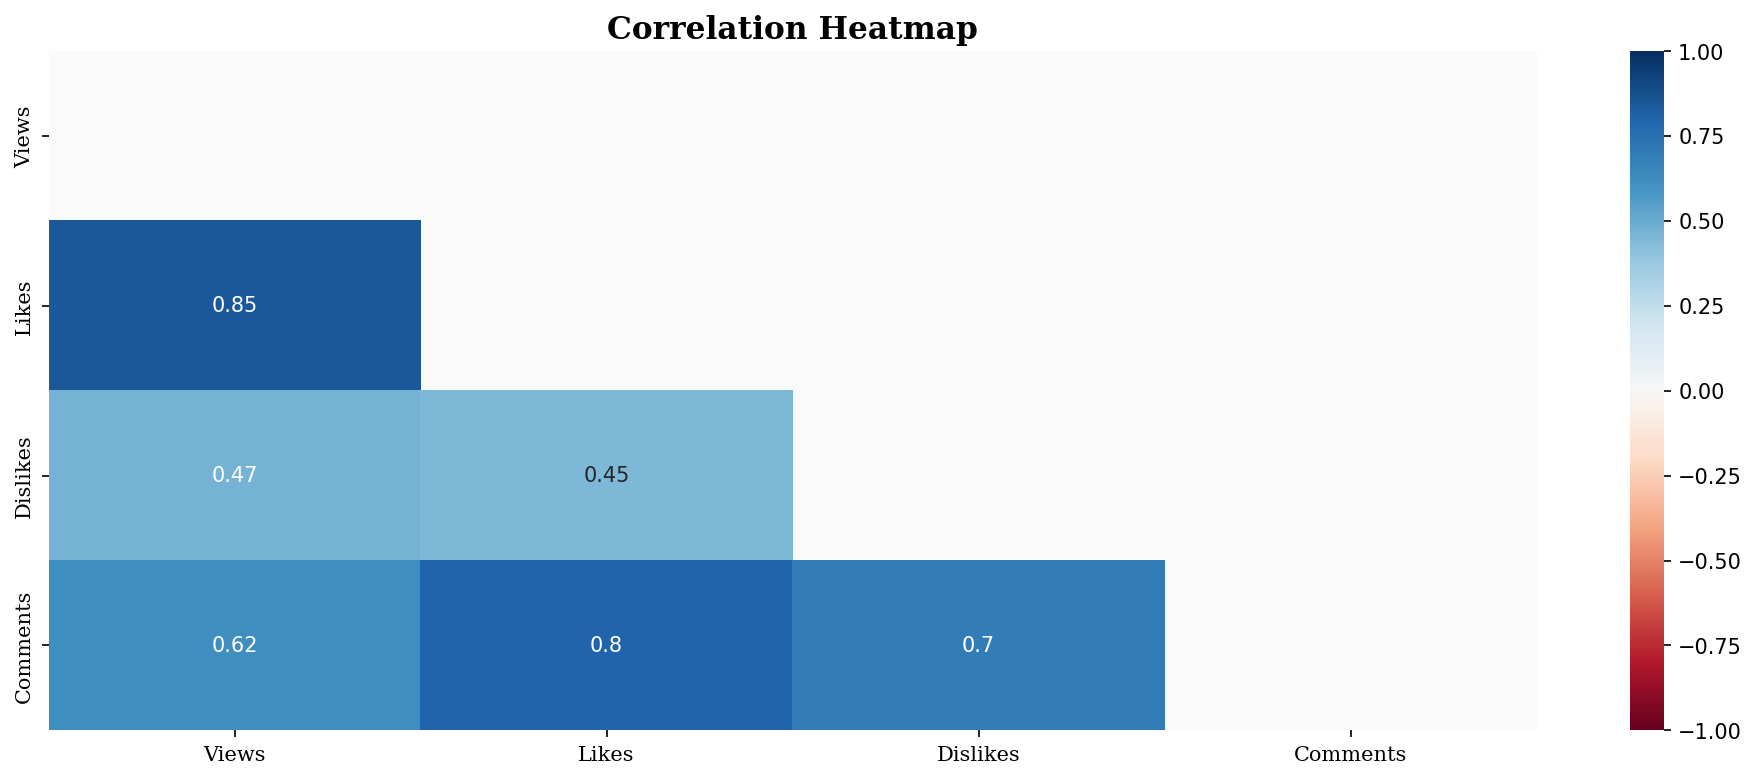

In [ ]:
fig = plt.figure(figsize=(16, 6), dpi=150)

mask = np.triu(np.ones_like(df[nums].corr(), dtype=np.bool))
heatmap = sns.heatmap(df[nums].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='RdBu')
heatmap.set_title('Correlation Heatmap', fontsize=15, fontweight='bold', fontfamily='serif')

xticklabels = ['Views','Likes','Dislikes','Comments']
heatmap.set_xticklabels(xticklabels, fontfamily='serif', rotation=0)

yticklabels = ['Views','Likes','Dislikes','Comments']
heatmap.set_yticklabels(yticklabels, fontfamily='serif', rotation=90)

heatmap.set_facecolor('#fafafa')

#plt.savefig('Correlation Heatmap.png', bbox_inches='tight')
plt.show()

## **VI. Number of Views by Title Category**

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/

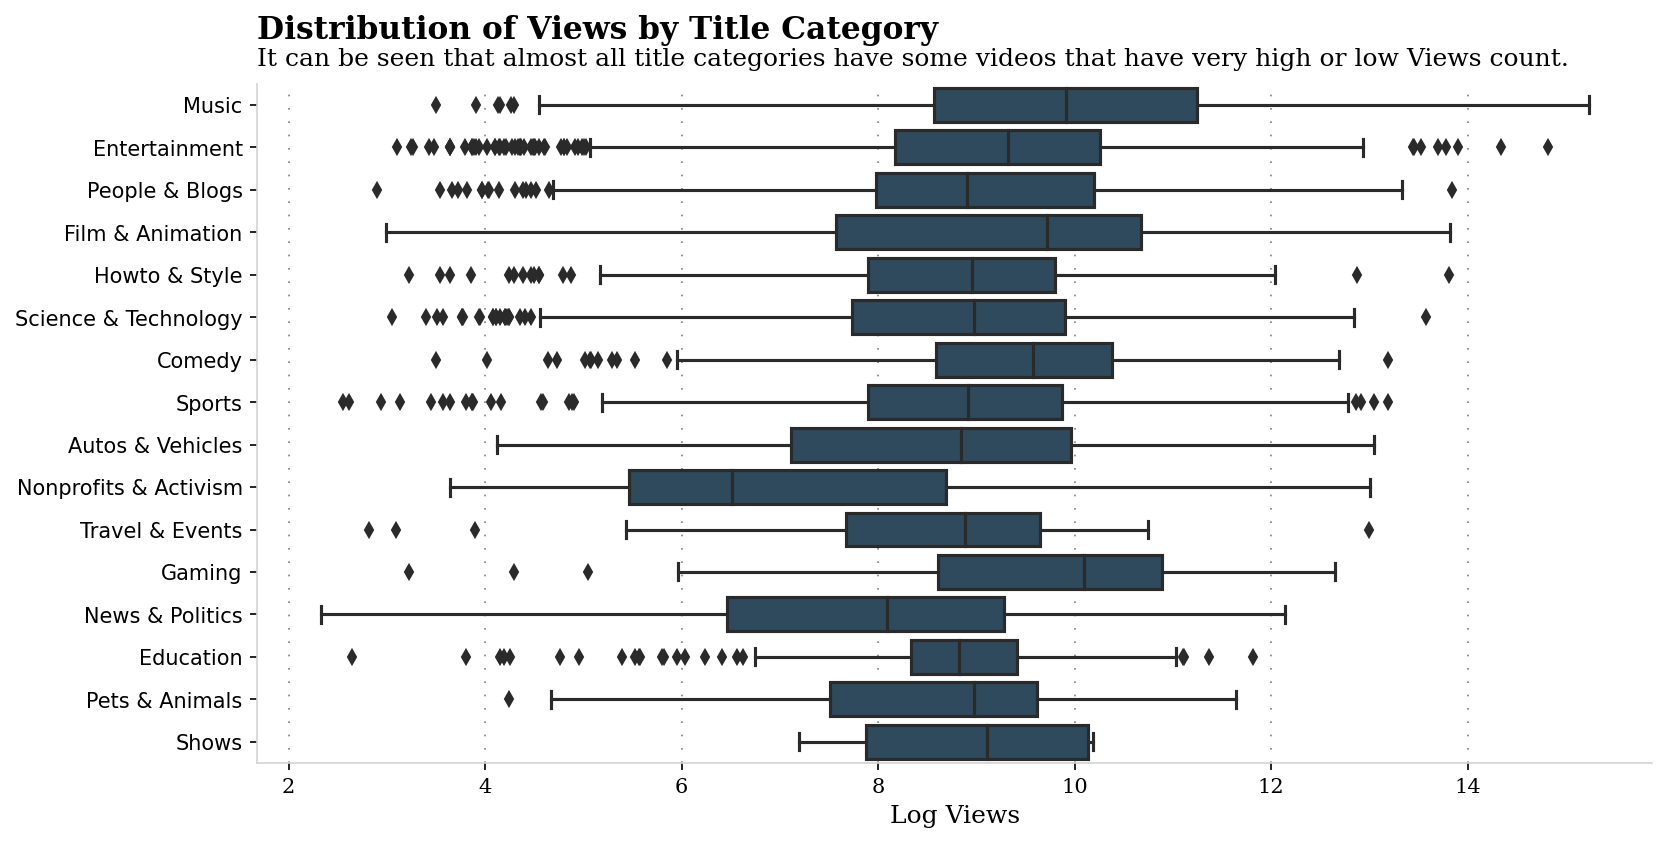

In [ ]:
ratio = df.drop_duplicates('video_id', keep ='last')
ratio['likes_log'] = np.log(ratio['likes'])
ratio['views_log'] = np.log(ratio['views'] )
ratio['dislikes_log'] = np.log(ratio['dislikes'] )
ratio['comment_log'] = np.log(ratio['comment_count'])

log_view = ratio.sort_values('views_log', ascending=False).reset_index()

fig, ax = plt.subplots(1,1, figsize=(12, 6), dpi=150)

color_map = ['#284B63' for _ in range(16)]

sns.boxplot(y='category_title', x='views_log', data=log_view, palette=color_map)

for s in ['top', 'right']:
  ax.spines[s].set_visible(False)

for t in ['left', 'bottom']:
    ax.spines[t].set_color('lightgray')

ax.grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,7))

xticklabels = np.arange(0, 17, 2)
#yticklabels = ratio['category_title']
ax.set_xticklabels(xticklabels, fontfamily='serif', rotation=0)
#ax.set_yticklabels(yticklabels, fontfamily='serif', rotation=0)
ax.set_axisbelow(True)

plt.xlabel('Log Views', fontsize=12, fontweight='light', fontfamily='serif')
plt.ylabel('')

fig.text(.125, .93, 'Distribution of Views by Title Category', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(.125, .9, 'It can be seen that almost all title categories have some videos that have very high or low Views count.', fontsize=12, fontweight='light', fontfamily='serif')

#plt.savefig('Distribution of Views by Title Category.png', bbox_inches='tight')
plt.show()

In [ ]:
ratio = df.drop_duplicates('video_id', keep ='last')
ratio = ratio.groupby(['category_title'])[['views','likes','dislikes','comment_count']].median().sort_values('views', ascending=False).reset_index()

ratio['likes_ratio'] = (ratio['likes']/ratio['views']) * 100
ratio['dislikes_ratio'] = (ratio['dislikes']/ratio['views']) * 100
ratio['comment_count_ratio'] = (ratio['comment_count']/ratio['views']) * 100

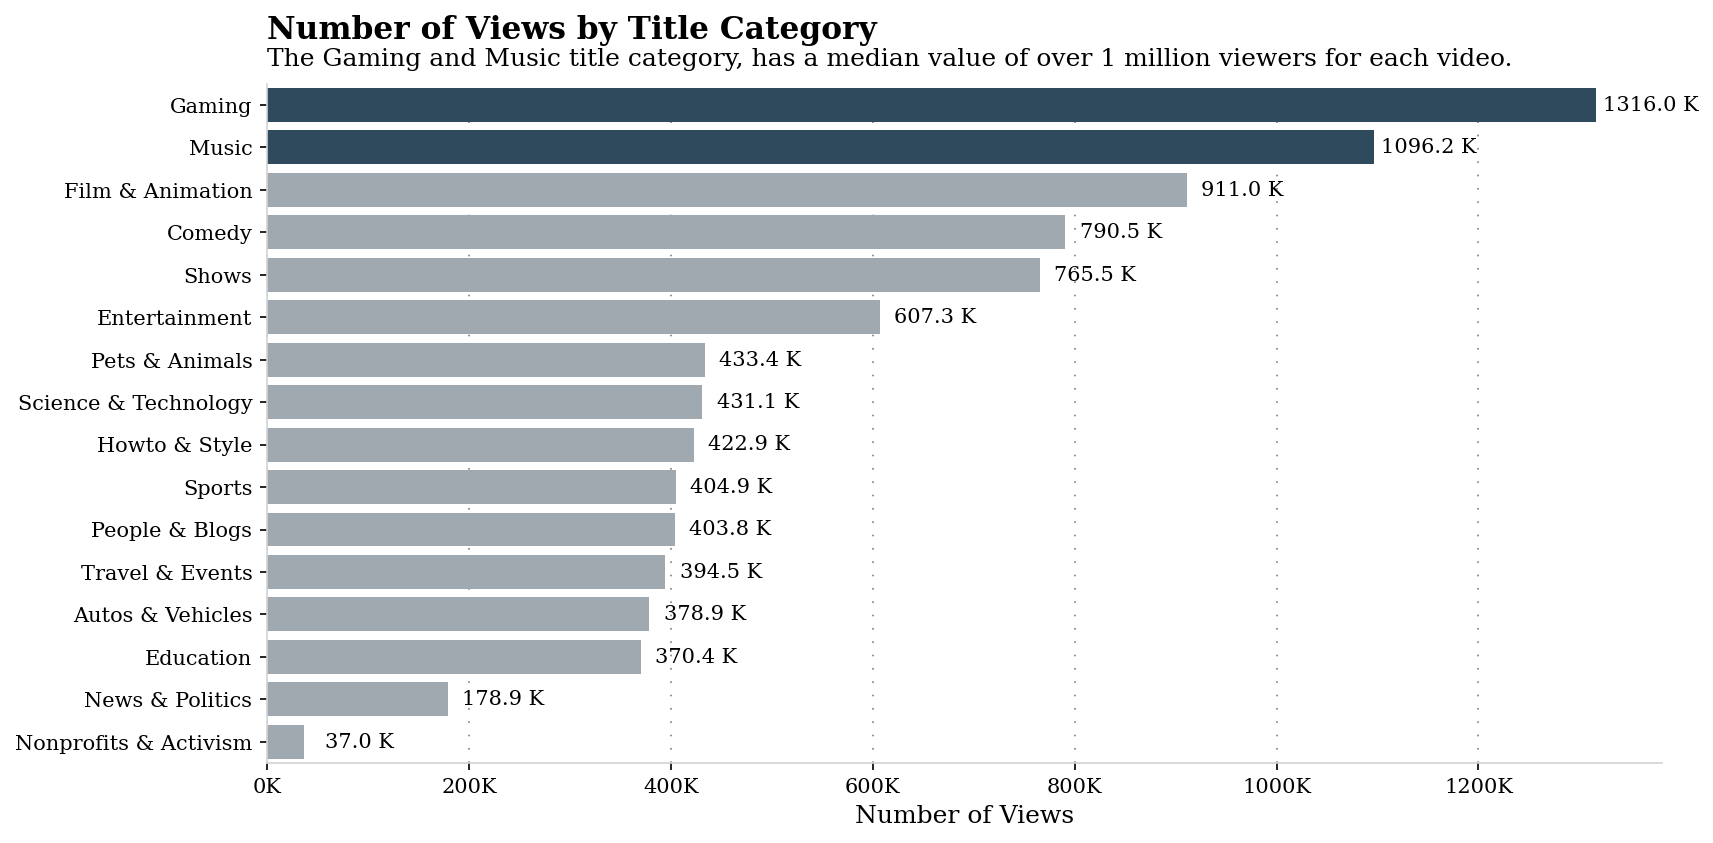

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12, 6), dpi=150)

color_map = ['#9DA9B1' for _ in range(16)]
for cm in range(2):
  color_map[cm] = '#284B63' 

sns.barplot(x='views', y='category_title', data=ratio, palette=color_map)

for i, j in ratio.iterrows():
  ax.annotate(f"{round(j['views']/1000, 1)} K", xy=(j['views']+55000, i), va = 'center', ha='center',fontweight='light', fontfamily='serif')

for s in ['top', 'right']:
  ax.spines[s].set_visible(False)

for t in ['left', 'bottom']:
    ax.spines[t].set_color('lightgray')

ax.grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,7))

xticklabels = ['0K','200K','400K','600K','800K','1000K','1200K','1400K']
yticklabels = ratio['category_title']
ax.set_xticklabels(xticklabels, fontfamily='serif', rotation=0)
ax.set_yticklabels(yticklabels, fontfamily='serif', rotation=0)
ax.set_axisbelow(True)

plt.xlabel('Number of Views', fontsize=12, fontweight='light', fontfamily='serif')
plt.ylabel('')

fig.text(.125, .93, 'Number of Views by Title Category', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(.125, .9, 'The Gaming and Music title category, has a median value of over 1 million viewers for each video.', fontsize=12, fontweight='light', fontfamily='serif')

#plt.savefig('Number of Views by Title Category.png', bbox_inches='tight')
plt.show()

## **VII. Views - Likes Ratio**

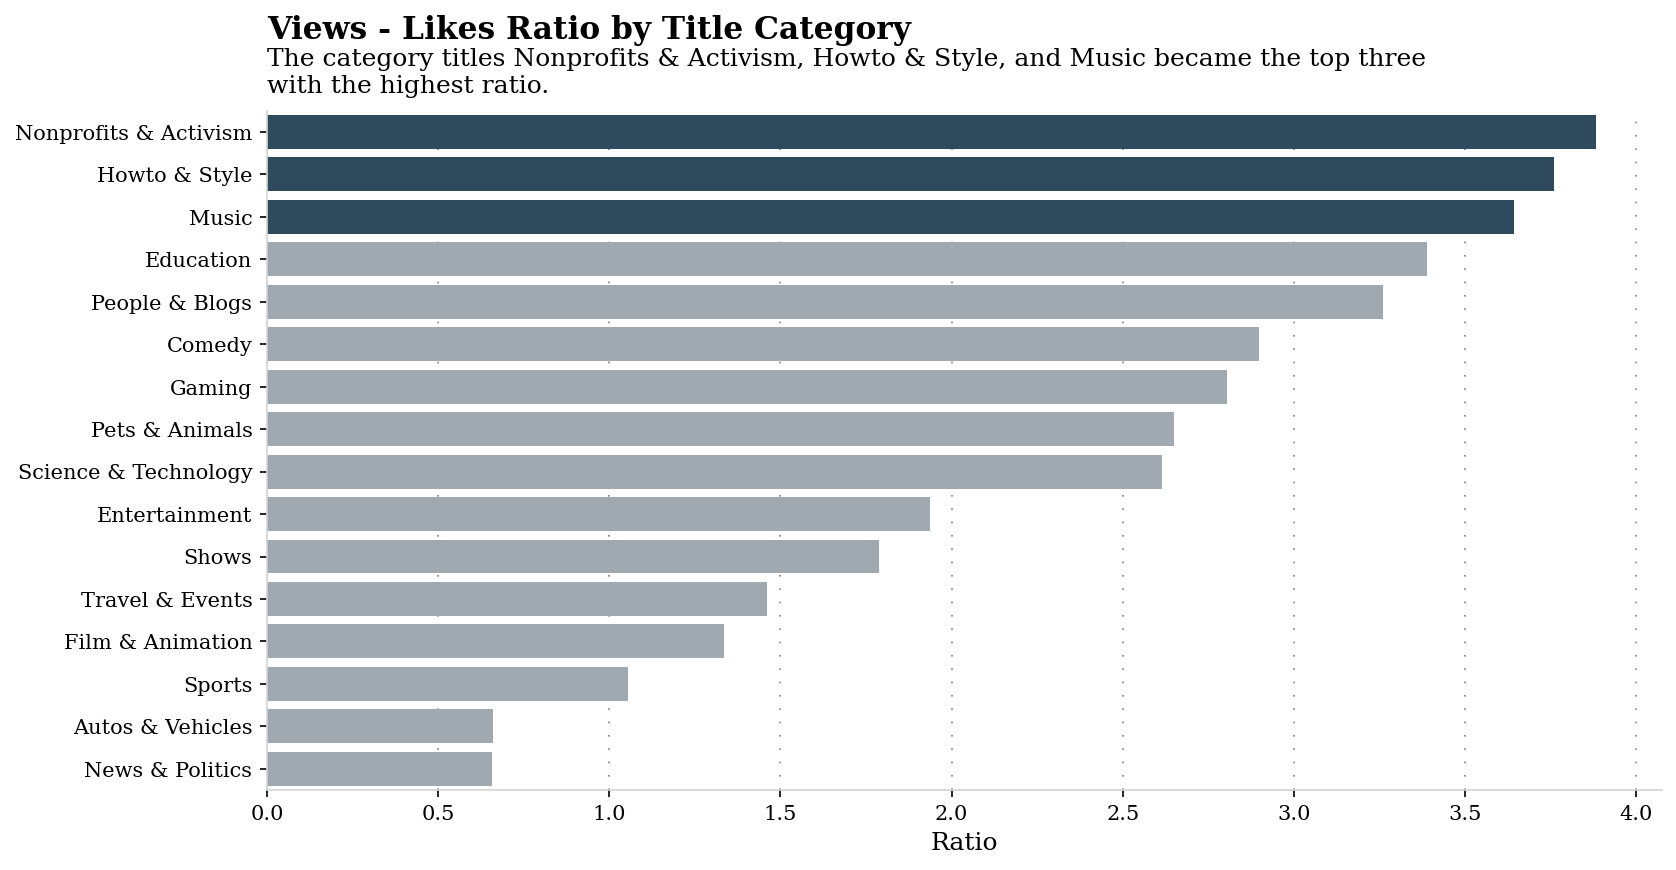

In [ ]:
likes_ratio = ratio.sort_values('likes_ratio', ascending=False)

fig, ax = plt.subplots(1,1, figsize=(12, 6), dpi=150)

color_map = ['#9DA9B1' for _ in range(16)]
for cm in range(3):
  color_map[cm] = '#284B63'

sns.barplot(x='likes_ratio', y='category_title', data=likes_ratio, palette=color_map)

for s in ['top', 'right']:
  ax.spines[s].set_visible(False)

for t in ['left', 'bottom']:
    ax.spines[t].set_color('lightgray')

ax.grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,7))

xticklabels = np.arange(0, 4.5, .5)
yticklabels = likes_ratio['category_title']
ax.set_xticklabels(xticklabels, fontfamily='serif', rotation=0)
ax.set_yticklabels(yticklabels, fontfamily='serif', rotation=0)
ax.set_axisbelow(True)

plt.xlabel('Ratio', fontsize=12, fontweight='light', fontfamily='serif')
plt.ylabel('')

fig.text(.125, .96, 'Views - Likes Ratio by Title Category', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(.125, .9, 'The category titles Nonprofits & Activism, Howto & Style, and Music became the top three\nwith the highest ratio.', fontsize=12, fontweight='light', fontfamily='serif')

#plt.savefig('Views - Likes Ratio by Title Category.png', bbox_inches='tight')
plt.show()

## **VIII. Views - Comment Count Ratio**

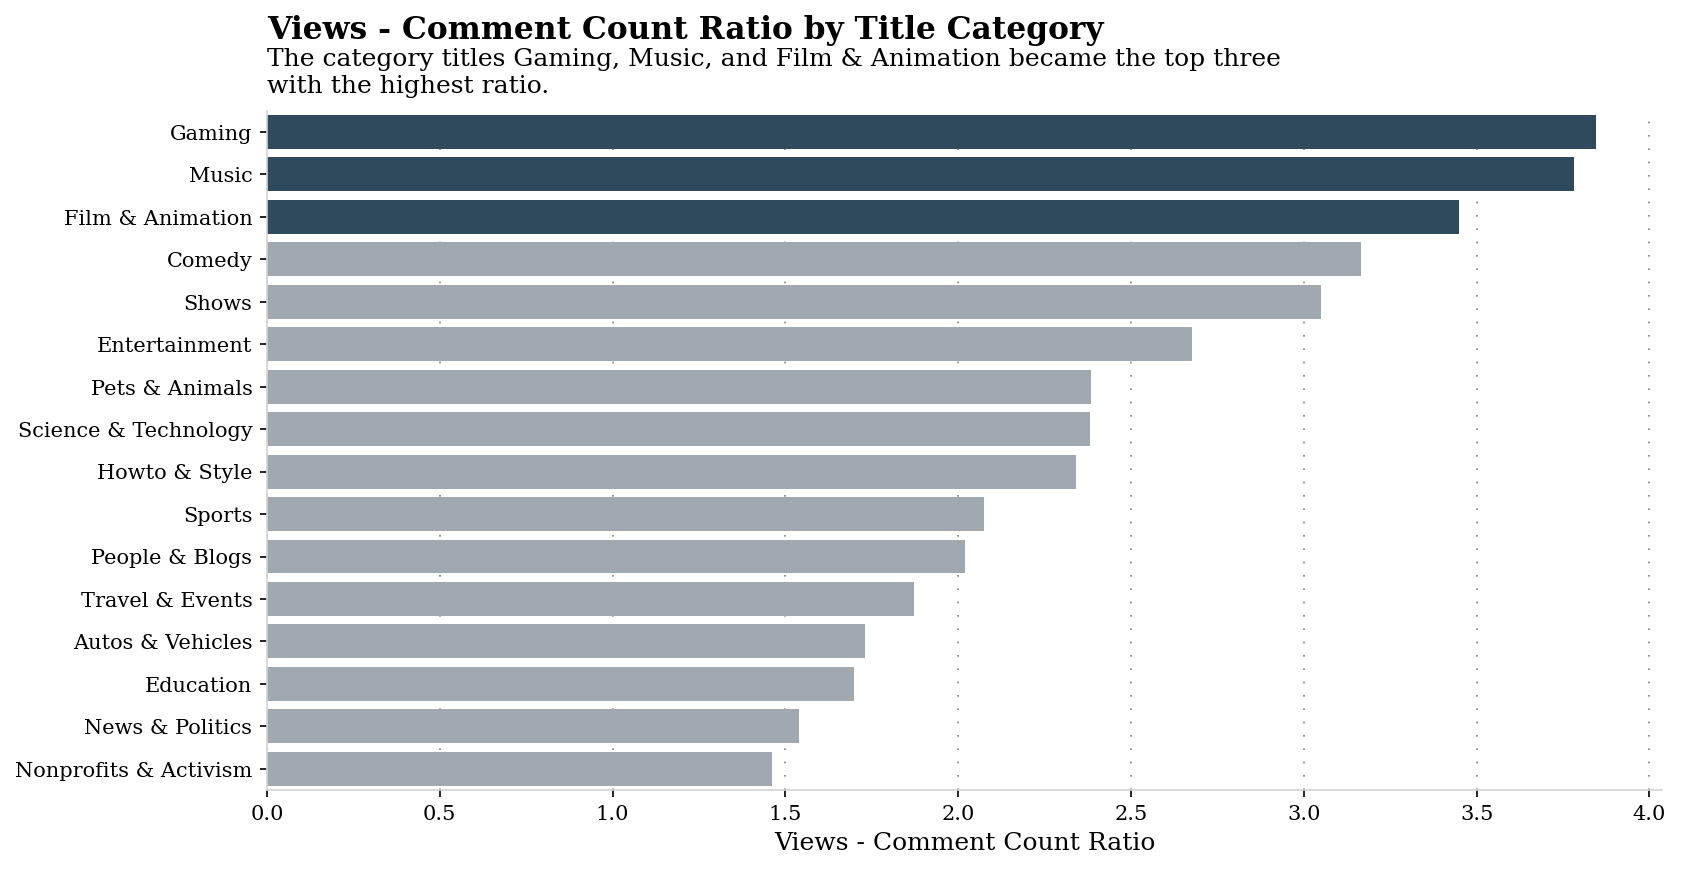

In [ ]:
comment_ratio = ratio.sort_values('comment_count_ratio', ascending=False)

fig, ax = plt.subplots(1,1, figsize=(12, 6), dpi=150)

color_map = ['#9DA9B1' for _ in range(16)]
for cm in range(3):
  color_map[cm] = '#284B63'

sns.barplot(x='comment_count_ratio', y='category_title', data=comment_ratio, palette=color_map)

for s in ['top', 'right']:
  ax.spines[s].set_visible(False)

for t in ['left', 'bottom']:
    ax.spines[t].set_color('lightgray')

ax.grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,7))

xticklabels = np.arange(0, 4.5, .5)
yticklabels = ratio['category_title']
ax.set_xticklabels(xticklabels, fontfamily='serif', rotation=0)
ax.set_yticklabels(yticklabels, fontfamily='serif', rotation=0)
ax.set_axisbelow(True)

plt.xlabel('Views - Comment Count Ratio', fontsize=12, fontweight='light', fontfamily='serif')
plt.ylabel('')

fig.text(.125, .96, 'Views - Comment Count Ratio by Title Category', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(.125, .9, 'The category titles Gaming, Music, and Film & Animation became the top three\nwith the highest ratio.', fontsize=12, fontweight='light', fontfamily='serif')

#plt.savefig('Views - Comment Count Ratio by Title Category.png', bbox_inches='tight')
plt.show()

## **IX. Views - Dislikes Ratio**

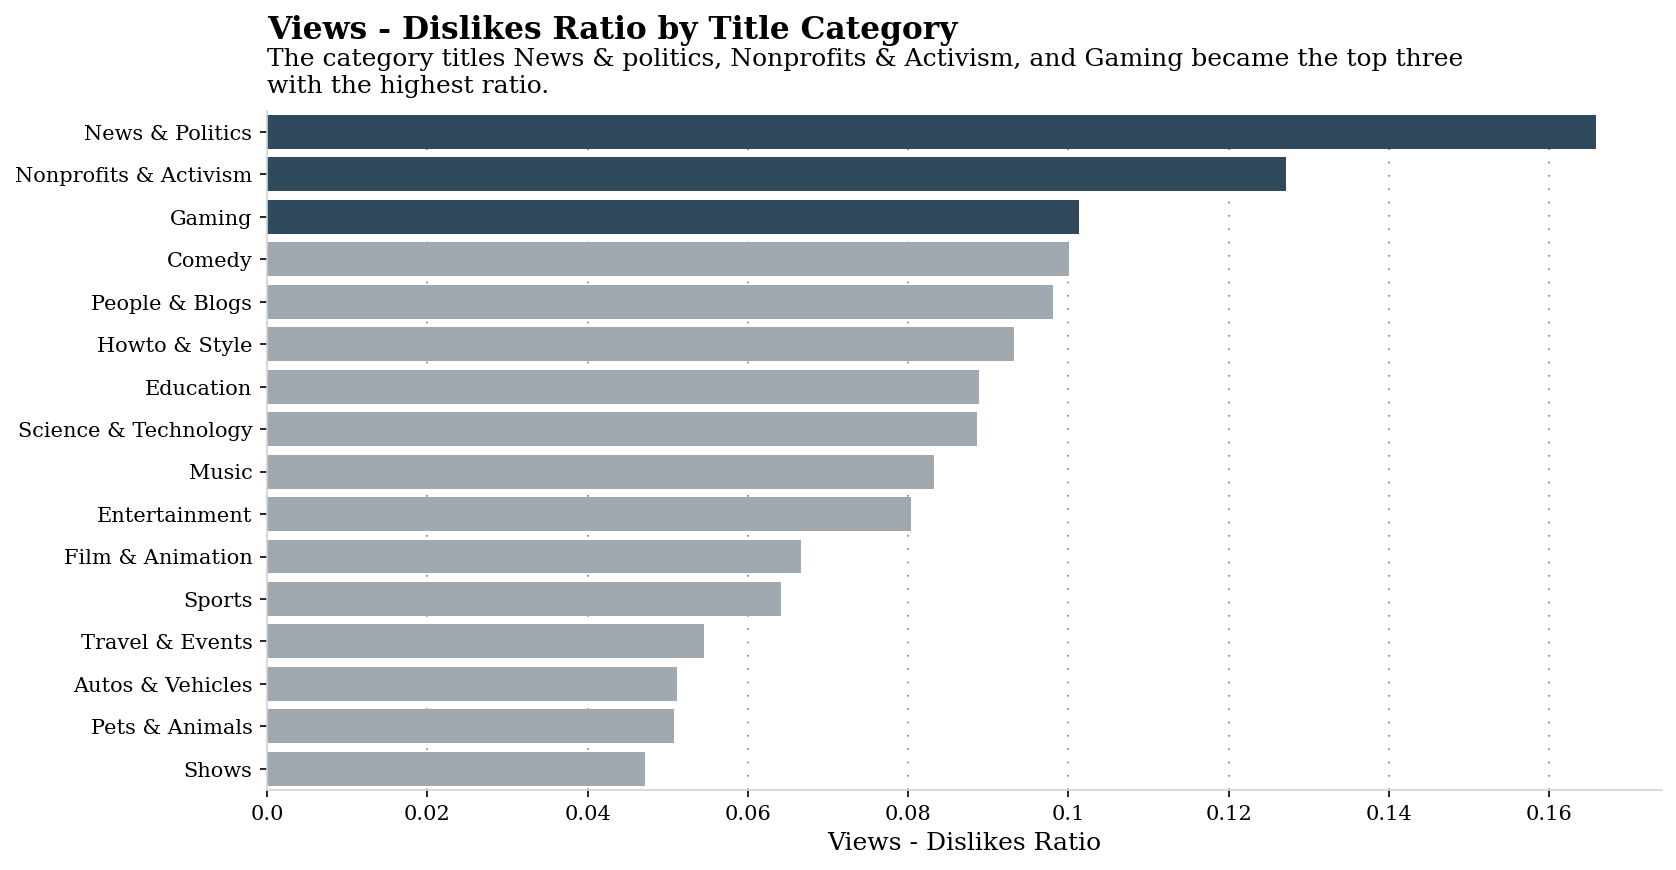

In [ ]:
dislikes_ratio = ratio.sort_values('dislikes_ratio', ascending=False)

fig, ax = plt.subplots(1,1, figsize=(12, 6), dpi=150)

color_map = ['#9DA9B1' for _ in range(16)]
for cm in range(3):
  color_map[cm] = '#284B63'

sns.barplot(x='dislikes_ratio', y='category_title', data=dislikes_ratio, palette=color_map)

for s in ['top', 'right']:
  ax.spines[s].set_visible(False)

for t in ['left', 'bottom']:
    ax.spines[t].set_color('lightgray')

ax.grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,7))

xticklabels = np.arange(0, .17, .02)
yticklabels = dislikes_ratio['category_title']
ax.set_xticklabels(xticklabels, fontfamily='serif', rotation=0)
ax.set_yticklabels(yticklabels, fontfamily='serif', rotation=0)
ax.set_axisbelow(True)

plt.xlabel('Views - Dislikes Ratio', fontsize=12, fontweight='light', fontfamily='serif')
plt.ylabel('')

fig.text(.125, .96, 'Views - Dislikes Ratio by Title Category', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(.125, .9, 'The category titles News & politics, Nonprofits & Activism, and Gaming became the top three\nwith the highest ratio.', fontsize=12, fontweight='light', fontfamily='serif')

#plt.savefig('Views - Dislikes Ratio by Title Category.png', bbox_inches='tight')
plt.show()

## **X. Time It Takes to Trend by Category Title**

In [ ]:
var = ['video_id','category_title','publish_time','trending_date']
time = df[var].reset_index().drop_duplicates('video_id', keep ='first')
time['publish_time'] = pd.to_datetime(time['publish_time'].dt.strftime('%Y-%m-%d'))
time['publish_to_tranding'] = (time['trending_date'] - time['publish_time']).dt.days

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


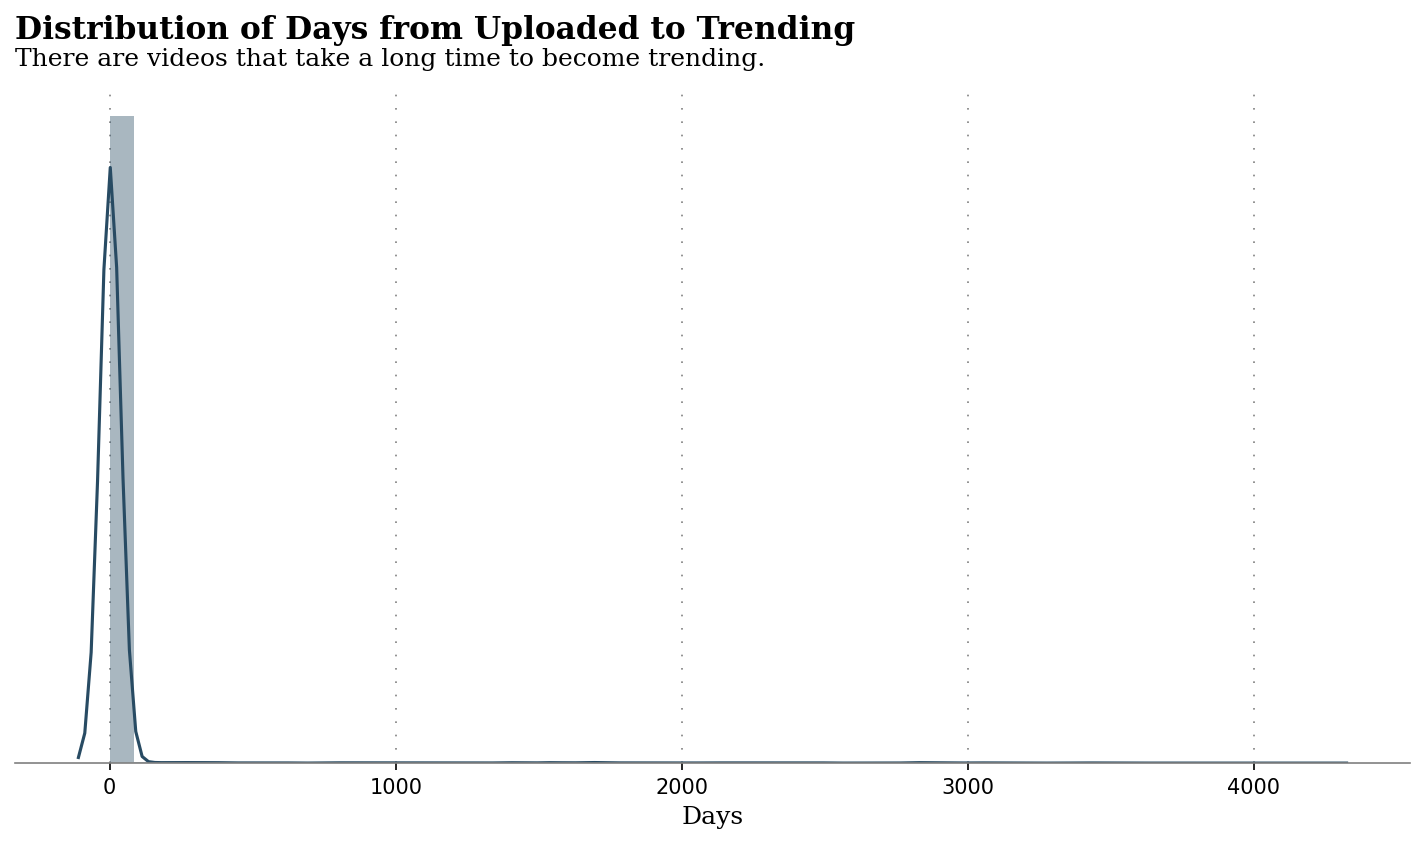

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12, 6), dpi=150)

sns.distplot(time['publish_to_tranding'], color='#284B63')

for s in ['left','top', 'right']:
  ax.spines[s].set_visible(False)

for t in ['left', 'bottom']:
    ax.spines[t].set_color('gray')

ax.grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,7))

ax.set_axisbelow(True)

ax.tick_params(axis='y', left=False)

ax.get_yaxis().set_visible(False)

plt.xlabel('Days', fontsize=12, fontweight='light', fontfamily='serif')
plt.ylabel('')

fig.text(.125, .93, 'Distribution of Days from Uploaded to Trending', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(.125, .9, 'There are videos that take a long time to become trending.', fontsize=12, fontweight='light', fontfamily='serif')

#plt.savefig('Distribution of Days from Uploaded to Trending.png', bbox_inches='tight')
plt.show()

In [ ]:
time.describe().T

count          mean           std  min     25%      50%  \
index                6351.0  19372.292237  11787.465688  0.0  8161.0  19692.0   
publish_to_tranding  6351.0     22.522280    209.963296  0.0     1.0      2.0   

                         75%      max  
index                28390.5  40924.0  
publish_to_tranding      3.0   4215.0

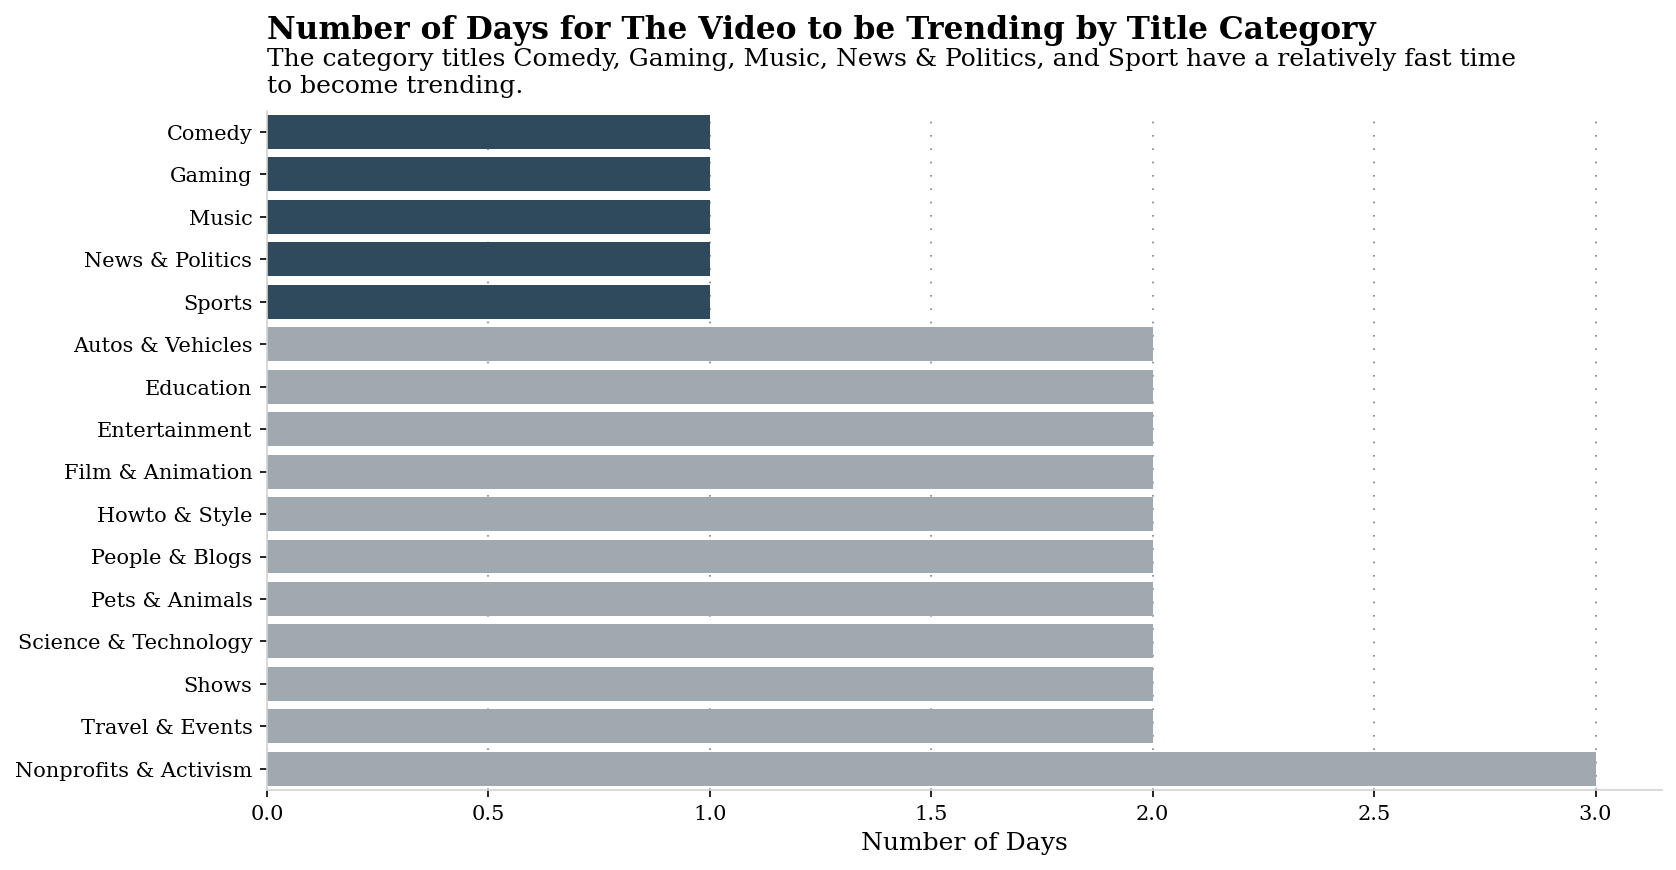

In [ ]:
trending_time = time.groupby('category_title')[['publish_to_tranding']].median().sort_values('publish_to_tranding').reset_index()

fig, ax = plt.subplots(1,1, figsize=(12, 6), dpi=150)

color_map = ['#9DA9B1' for _ in range(16)]
for cm in range(5):
  color_map[cm] = '#284B63'  

sns.barplot(x='publish_to_tranding', y='category_title', data=trending_time, palette=color_map)


for s in ['top', 'right']:
  ax.spines[s].set_visible(False)

for t in ['left', 'bottom']:
    ax.spines[t].set_color('lightgray')

ax.grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,7))

xticklabels = np.arange(0, 3.1, .5)
yticklabels = trending_time['category_title']
ax.set_xticklabels(xticklabels, fontfamily='serif', rotation=0)
ax.set_yticklabels(yticklabels, fontfamily='serif', rotation=0)
ax.set_axisbelow(True)

plt.xlabel('Number of Days', fontsize=12, fontweight='light', fontfamily='serif')
plt.ylabel('')

fig.text(.125, .96, 'Number of Days for The Video to be Trending by Title Category', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(.125, .9, 'The category titles Comedy, Gaming, Music, News & Politics, and Sport have a relatively fast time\nto become trending.', fontsize=12, fontweight='light', fontfamily='serif')

#plt.savefig('Number of Days for The Video to be Trending by Title Category.png', bbox_inches='tight')
plt.show()

## **XI. Month of Upload for Trending Videos**

In [ ]:
time['publish_month'] = time['publish_time'].dt.month
month_publish = time.groupby('publish_month')[['video_id']].count().reset_index()

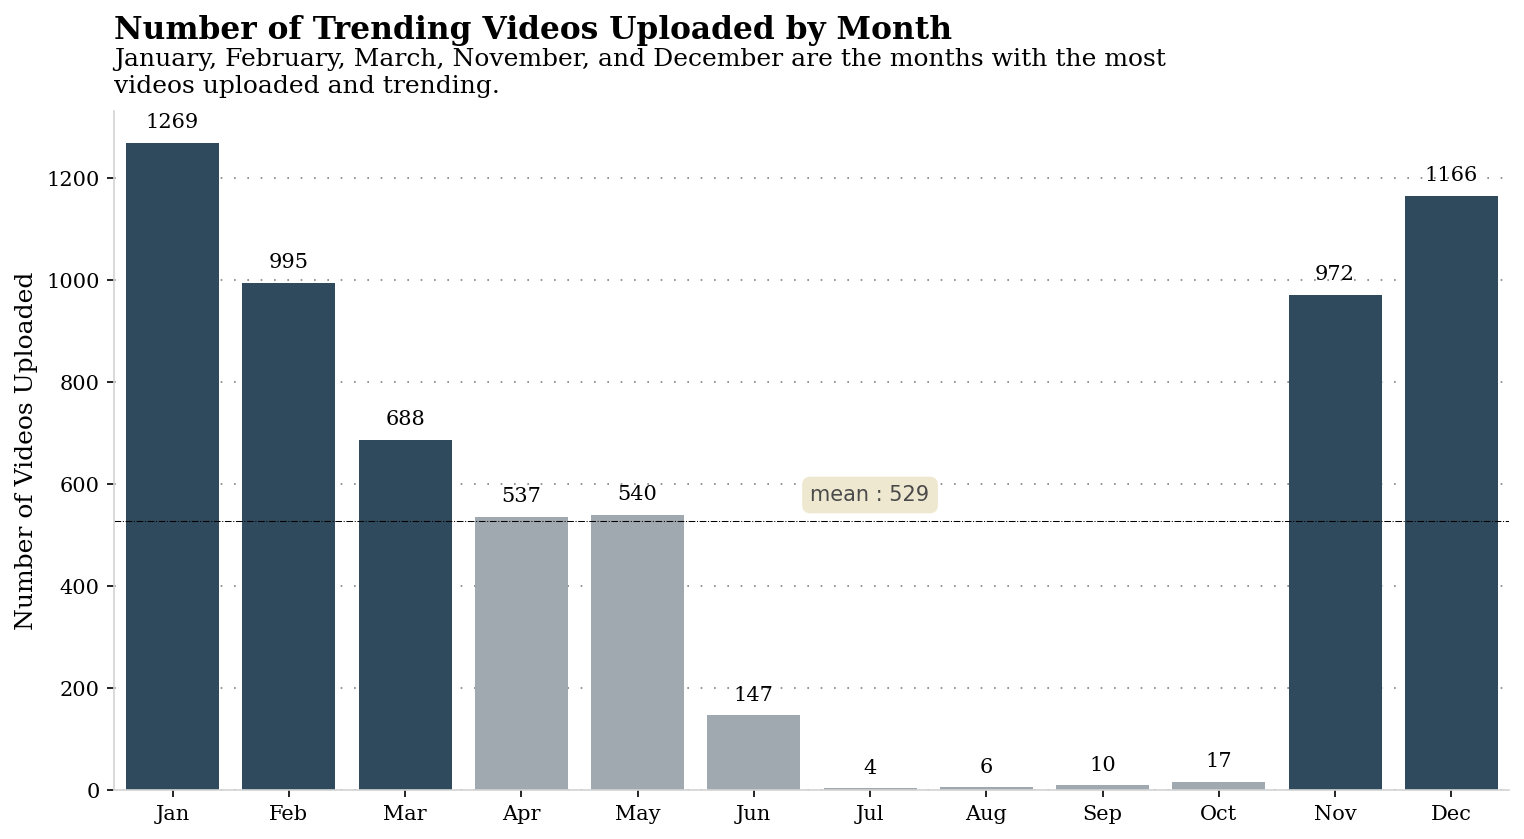

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12, 6), dpi=150)

color_map = ['#9DA9B1' for _ in range(16)]
color_map[11] = color_map[10] = color_map[2] = color_map[1] = color_map[0] = '#284B63'  

sns.barplot(x='publish_month', y='video_id', data=month_publish, palette=color_map)

for i, j in month_publish.iterrows():
  ax.annotate(f"{round(j['video_id'])}", xy=(i, j['video_id']+40), va = 'center', ha='center',fontweight='light', fontfamily='serif')

for s in ['top', 'right']:
  ax.spines[s].set_visible(False)

for t in ['left', 'bottom']:
    ax.spines[t].set_color('lightgray')

ax.grid(which='major', axis='y', zorder=0, color='gray', linestyle=':', dashes=(1,7))

yticklabels = np.arange(0, 1205, 200)
xticklabels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ax.set_xticklabels(xticklabels, fontfamily='serif', rotation=0)
ax.set_yticklabels(yticklabels, fontfamily='serif', rotation=0)
ax.set_axisbelow(True)

plt.ylabel('Number of Videos Uploaded', fontsize=12, fontweight='light', fontfamily='serif')
plt.xlabel('')

fig.text(.125, .96, 'Number of Trending Videos Uploaded by Month', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(.125, .9, 'January, February, March, November, and December are the months with the most\nvideos uploaded and trending.', fontsize=12, fontweight='light', fontfamily='serif')

mean = month_publish['video_id'].mean()
ax.axhline(mean, color='black', linewidth=.5, linestyle='dashdot')
ax.annotate(f"mean : {round(mean)}", 
            xy=(6, mean+50),
            va = 'center', ha='center',
            color='#4a4a4a',
            bbox=dict(boxstyle='round', pad=0.4, facecolor='#efe8d1', linewidth=0))

#plt.savefig('Number of Trending Videos Uploaded by Month.png', bbox_inches='tight')
plt.show()

## **XII. Day of Upload for Trending Videos**

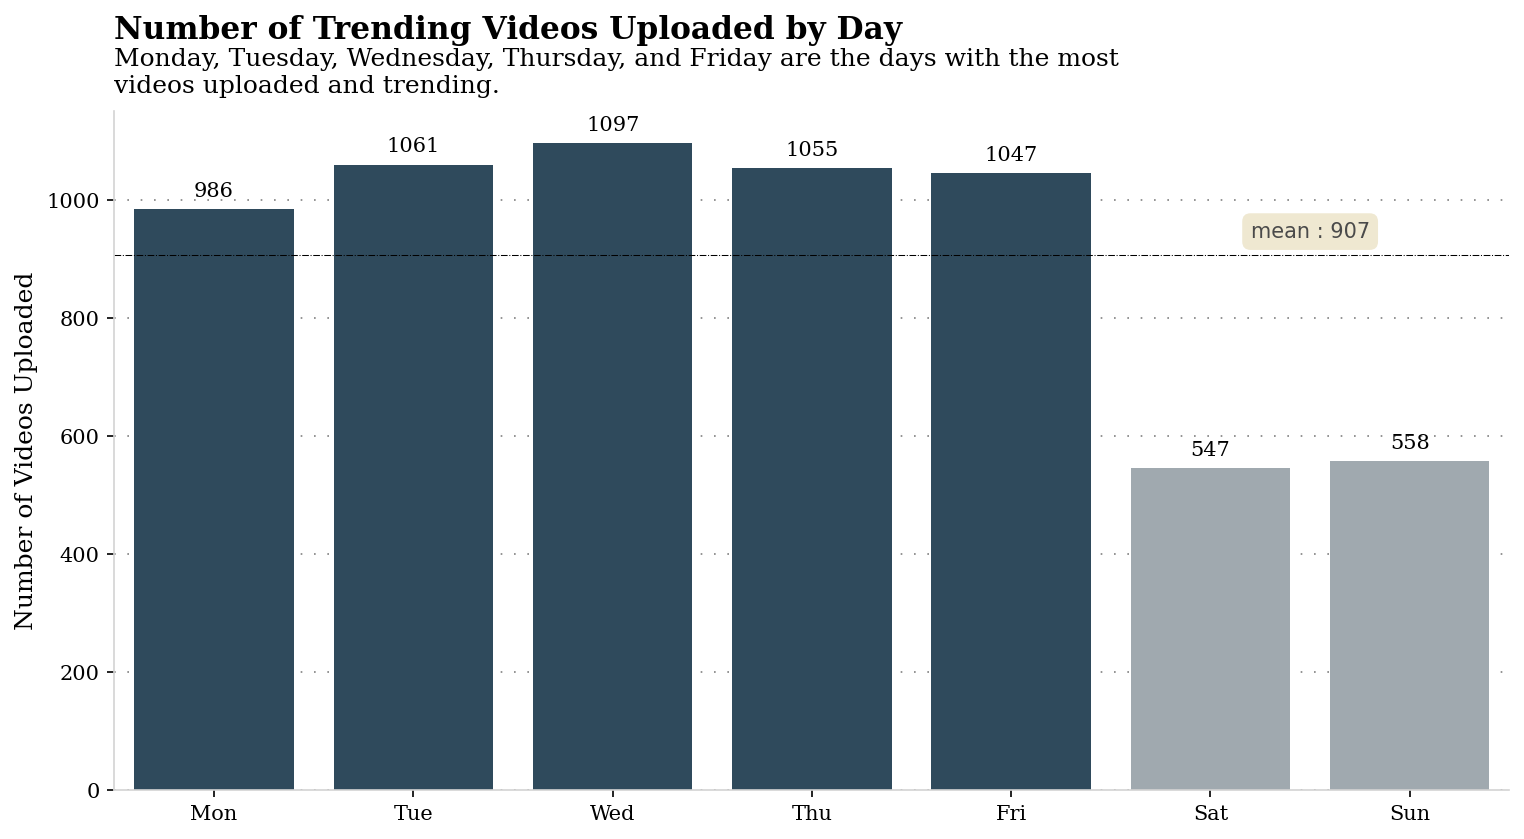

In [ ]:
time['publish_day'] = time['publish_time'].dt.weekday
day_publish = time.groupby('publish_day')[['video_id']].count().reset_index()

fig, ax = plt.subplots(1,1, figsize=(12, 6), dpi=150)

color_map = ['#9DA9B1' for _ in range(16)]
for cm in range(5):
  color_map[cm] = '#284B63' 

sns.barplot(x='publish_day', y='video_id', data=day_publish, palette=color_map)

for i, j in day_publish.iterrows():
  ax.annotate(f"{round(j['video_id'])}", xy=(i, j['video_id']+30), va = 'center', ha='center',fontweight='light', fontfamily='serif')

for s in ['top', 'right']:
  ax.spines[s].set_visible(False)

for t in ['left', 'bottom']:
    ax.spines[t].set_color('lightgray')

ax.grid(which='major', axis='y', zorder=0, color='gray', linestyle=':', dashes=(1,7))

yticklabels = np.arange(0, 1205, 200)
xticklabels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
ax.set_xticklabels(xticklabels, fontfamily='serif', rotation=0)
ax.set_yticklabels(yticklabels, fontfamily='serif', rotation=0)
ax.set_axisbelow(True)

plt.ylabel('Number of Videos Uploaded', fontsize=12, fontweight='light', fontfamily='serif')
plt.xlabel('')

fig.text(.125, .96, 'Number of Trending Videos Uploaded by Day', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(.125, .9, 'Monday, Tuesday, Wednesday, Thursday, and Friday are the days with the most\nvideos uploaded and trending.', fontsize=12, fontweight='light', fontfamily='serif')

mean = day_publish['video_id'].mean()
ax.axhline(mean, color='black', linewidth=.5, linestyle='dashdot')
ax.annotate(f"mean : {round(mean)}", 
            xy=(5.5, mean+40),
            va = 'center', ha='center',
            color='#4a4a4a',
            bbox=dict(boxstyle='round', pad=0.4, facecolor='#efe8d1', linewidth=0))

#plt.savefig('Number of Trending Videos Uploaded by Day.png', bbox_inches='tight')
plt.show()

## **XIII. Hour of Upload for Trending Videos**

In [ ]:
hour = df[var].reset_index().drop_duplicates('video_id', keep ='first')
hour['hour_publish'] = hour['publish_time'].dt.hour
hour = hour.groupby('hour_publish')[['video_id']].count().reset_index()

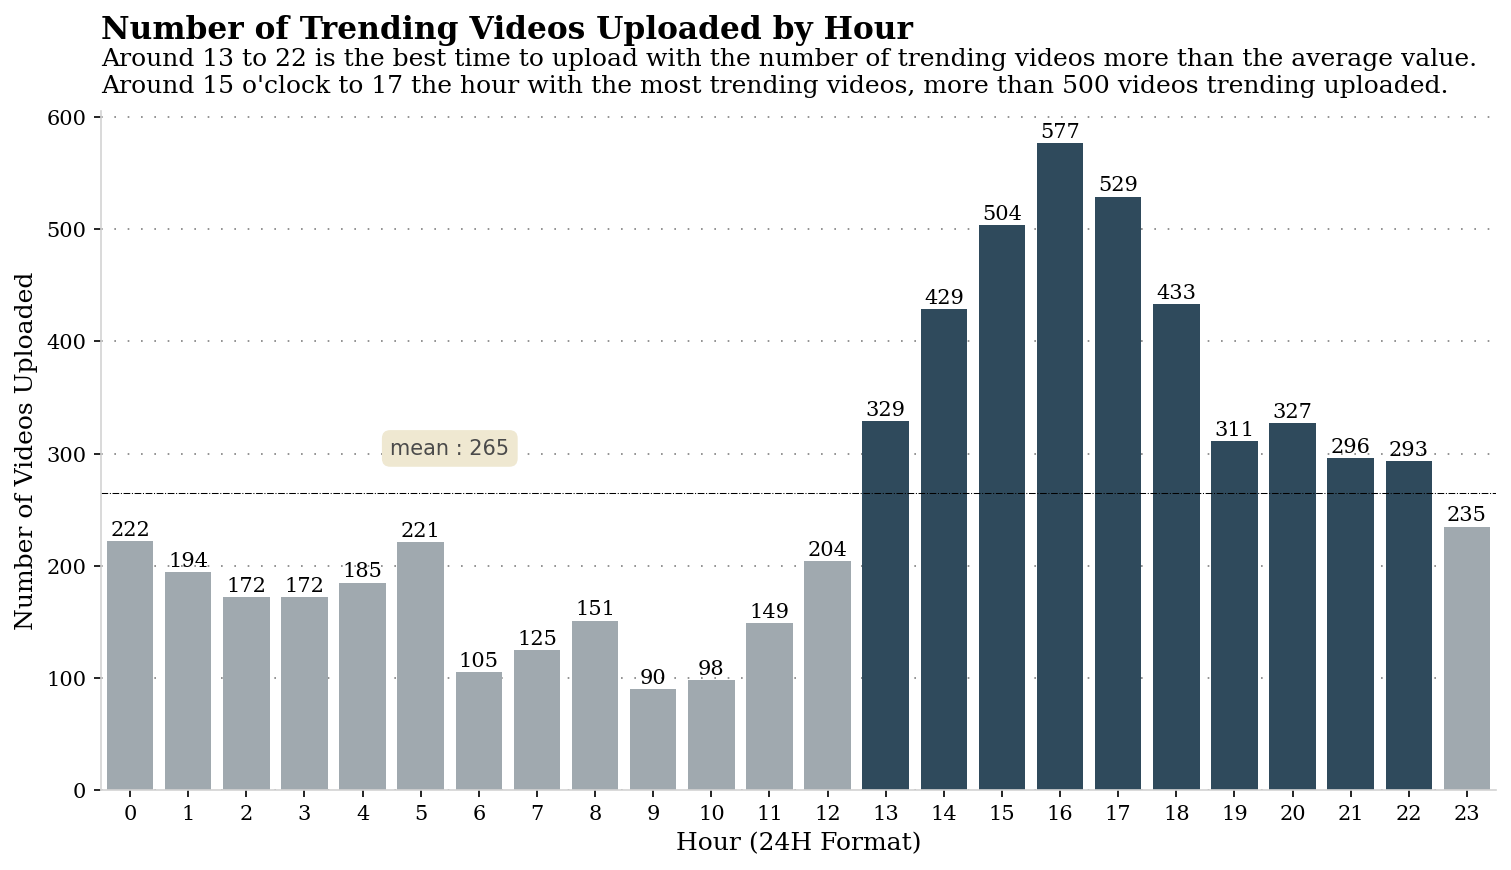

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12, 6), dpi=150)

color_map = ['#9DA9B1' for _ in range(24)]
for cm in range(13, 23):
  color_map[cm] = '#284B63'

sns.barplot(x='hour_publish', y='video_id', data=hour, palette=color_map)

for i, j in hour.iterrows():
  ax.annotate(f"{round(j['video_id'])}", xy=(i, j['video_id']+10), va = 'center', ha='center',fontweight='light', fontfamily='serif')

for s in ['top', 'right']:
  ax.spines[s].set_visible(False)

for t in ['left', 'bottom']:
    ax.spines[t].set_color('lightgray')

ax.grid(which='major', axis='y', zorder=0, color='gray', linestyle=':', dashes=(1,7))

yticklabels = np.arange(0, 605, 100)
xticklabels = np.arange(0, 24, 1)
ax.set_xticklabels(xticklabels, fontfamily='serif', rotation=0)
ax.set_yticklabels(yticklabels, fontfamily='serif', rotation=0)
ax.set_axisbelow(True)

plt.xlabel('Hour (24H Format)', fontsize=12, fontweight='light', fontfamily='serif')
plt.ylabel('Number of Videos Uploaded', fontsize=12, fontweight='light', fontfamily='serif')

fig.text(.125, .96, 'Number of Trending Videos Uploaded by Hour', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(.125, .9, "Around 13 to 22 is the best time to upload with the number of trending videos more than the average value.\nAround 15 o'clock to 17 the hour with the most trending videos, more than 500 videos trending uploaded.", fontsize=12, fontweight='light', fontfamily='serif')

mean = hour['video_id'].mean()
ax.axhline(mean, color='black', linewidth=.5, linestyle='dashdot')
ax.annotate(f"mean : {round(mean)}", 
            xy=(5.5, mean+40),
            va = 'center', ha='center',
            color='#4a4a4a',
            bbox=dict(boxstyle='round', pad=0.4, facecolor='#efe8d1', linewidth=0))

#plt.savefig('Number of Trending Videos Uploaded by Hour.png', bbox_inches='tight')
plt.show()

## **XIV. Title Length**

In [ ]:
title = df.drop_duplicates('video_id', keep ='last')
title['title_length'] = title['video_title'].apply(lambda x: len(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


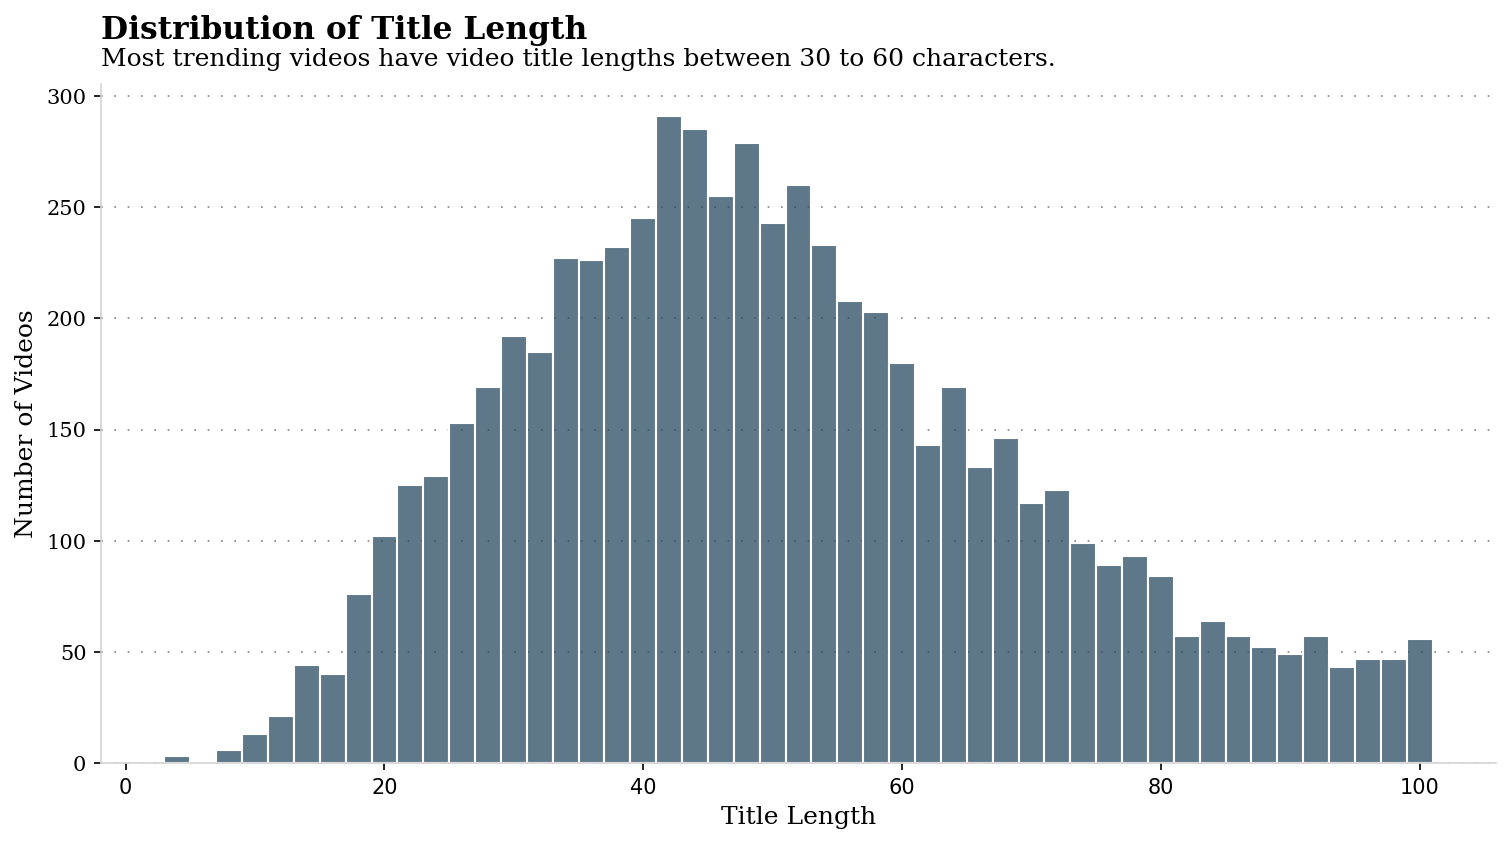

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12, 6), dpi=150)

sns.histplot(title, x='title_length', binwidth=2, color = '#284B63', ec='white')

for s in ['top', 'right']:
  ax.spines[s].set_visible(False)

for t in ['left', 'bottom']:
    ax.spines[t].set_color('lightgray')

ax.grid(which='major', axis='y', zorder=0, color='gray', linestyle=':', dashes=(1,7))

yticklabels = np.arange(0, 301, 50)
ax.set_yticklabels(yticklabels, fontfamily='serif', rotation=0)
ax.set_axisbelow(True)

plt.xlabel('Title Length', fontsize=12, fontweight='light', fontfamily='serif')
plt.ylabel('Number of Videos', fontsize=12, fontweight='light', fontfamily='serif')

fig.text(.125, .93, 'Distribution of Title Length', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(.125, .9, "Most trending videos have video title lengths between 30 to 60 characters.", fontsize=12, fontweight='light', fontfamily='serif')

#plt.savefig('Distribution of Title Length.png', bbox_inches='tight')
plt.show()

## **XV. Most Common Words in Video Titles**

In [ ]:
title_words = list(title['video_title'].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
title_words_ = pd.DataFrame(Counter(title_words).most_common(5))
title_words_

0     1
0    |  1788
1    -  1554
2  The   927
3  the   616
4   to   405

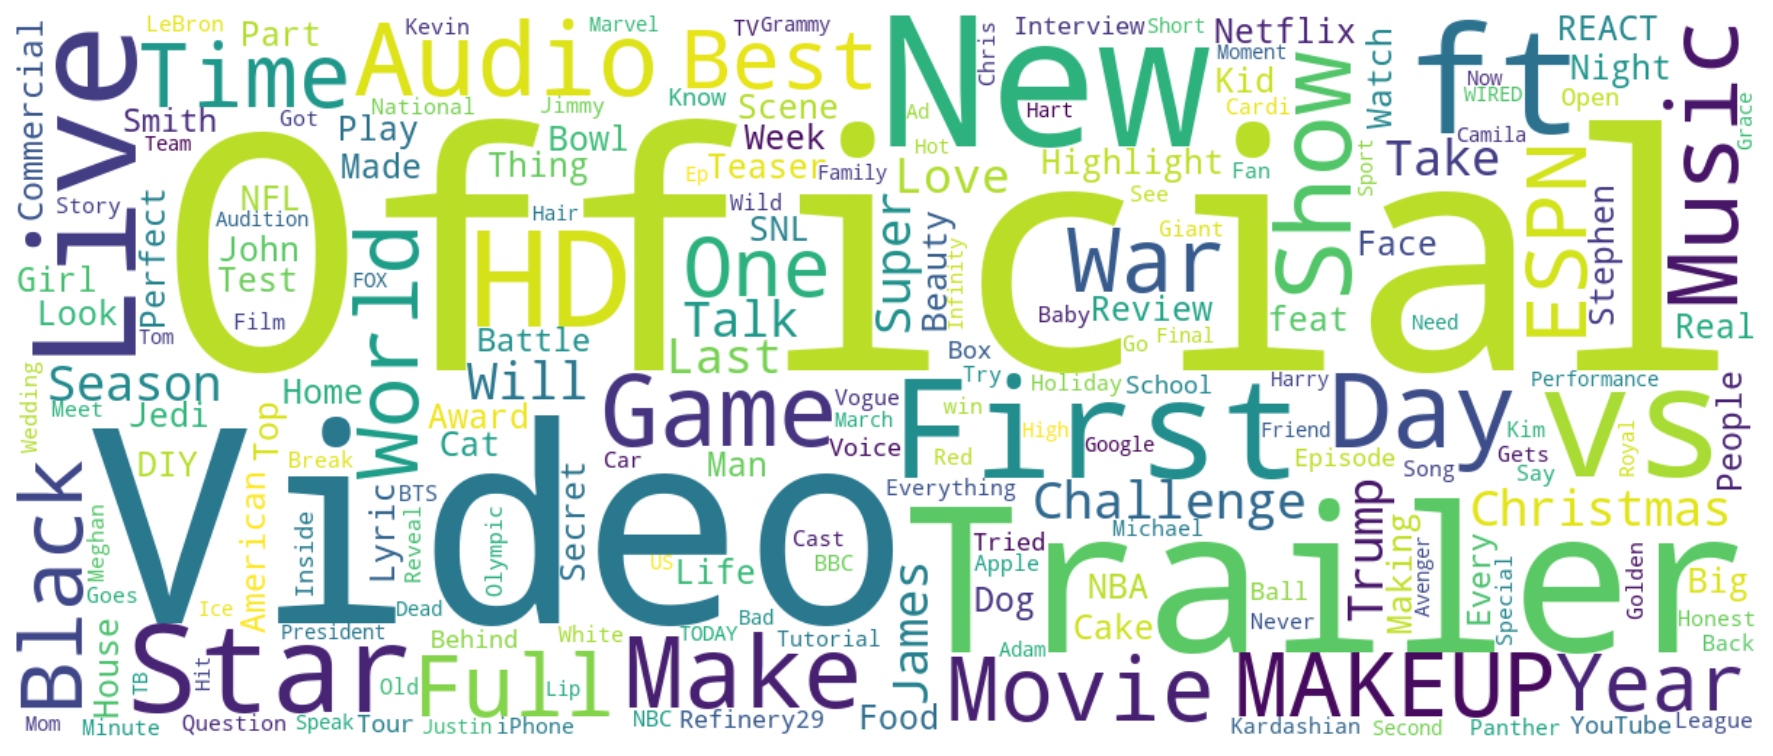

In [ ]:
wc = WordCloud(width=1200, height=500, collocations=False, background_color='white', colormap=None).generate(' '.join(title_words))
plt.figure(figsize=(15,10), dpi=150)
plt.imshow(wc, interpolation='bilinear')
plt.axis(False)

#plt.savefig('WordCloud.png', bbox_inches='tight')
plt.show()

# **C. Segmentation**

## **I. Preprocessing**

In [ ]:
cluster = df.drop_duplicates('video_id', keep ='first')
cluster['likes_log'] = np.log(cluster['likes'])
cluster['views_log'] = np.log(cluster['views'] )
cluster['dislikes_log'] = np.log(cluster['dislikes'] )
cluster['comment_log'] = np.log(cluster['comment_count'])
cls = ['views','likes','dislikes','comment_count']
cls_log = ['views_log','likes_log','dislikes_log','comment_log']

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/

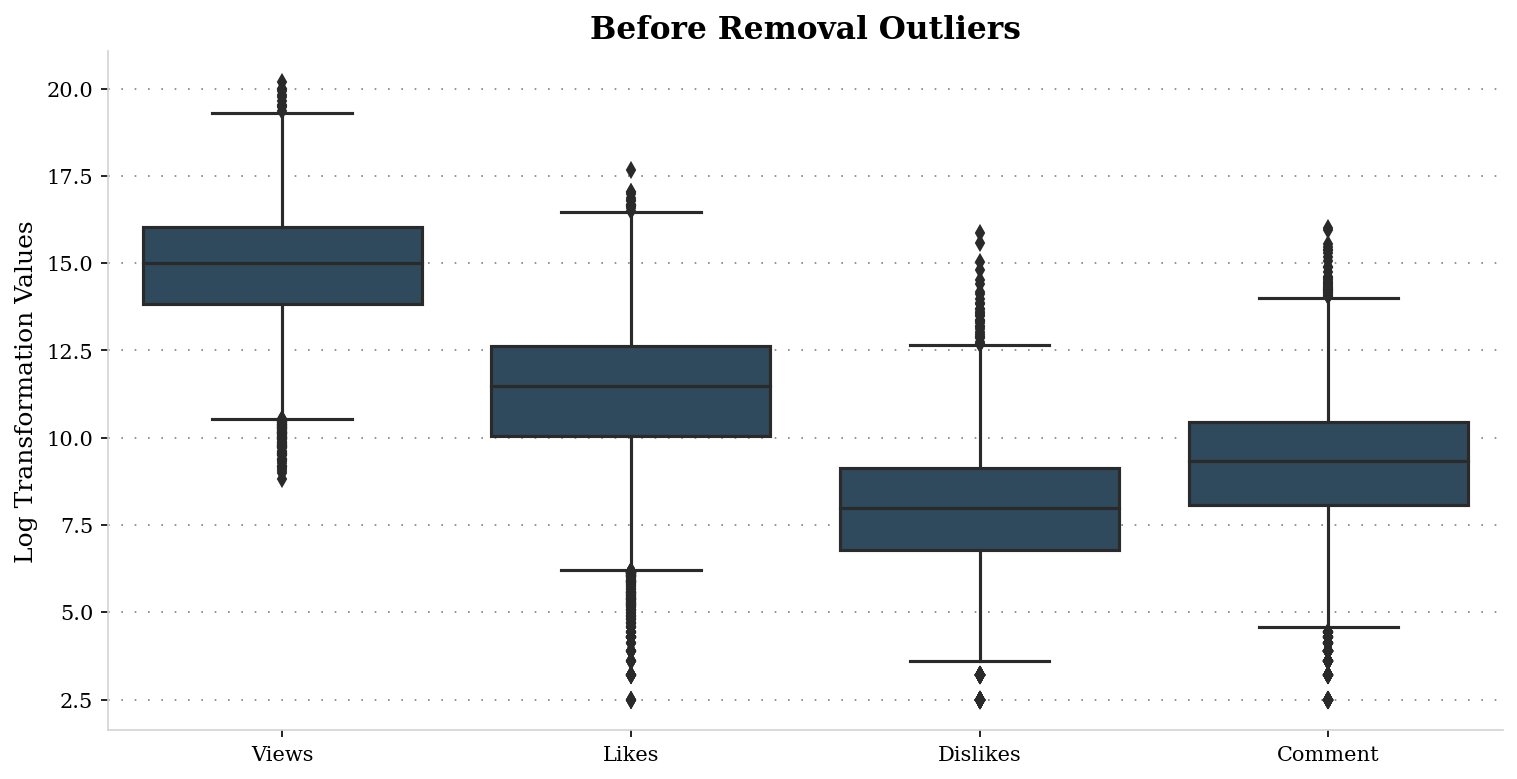

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12, 6), dpi=150)

color_map = ['#284B63' for _ in range(4)]

sns.boxplot(data=cluster[cls_log], palette=color_map)

for s in ['top', 'right']:
  ax.spines[s].set_visible(False)

for t in ['left', 'bottom']:
    ax.spines[t].set_color('lightgray')

ax.grid(which='major', axis='y', zorder=0, color='gray', linestyle=':', dashes=(1,7))

xticklabels = ['Views','Likes','Dislikes','Comment']
yticklabels = np.arange(0, 20.5, 2.5)
ax.set_xticklabels(xticklabels, fontfamily='serif', rotation=0)
ax.set_yticklabels(yticklabels, fontfamily='serif', rotation=0)
ax.set_axisbelow(True)

plt.ylabel('Log Transformation Values', fontsize=12, fontweight='light', fontfamily='serif')
plt.xlabel('')

plt.title('Before Removal Outliers', fontsize=15, fontweight='bold', fontfamily='serif')

#plt.savefig('Before Removal Outliers.png', bbox_inches='tight')
plt.show()

In [ ]:
print(f'Number of rows before removal outliers: {len(cluster)}')

filtered_entries = np.array([True] * len(cluster))
for col in cluster[cls].columns:
    Q1 = cluster[col].quantile(0.25)
    Q3 = cluster[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (1.5 * IQR)
    high_limit = Q3 + (1.5 * IQR)

    filtered_entries = ((cluster[col] >= low_limit) & (cluster[col] <= high_limit)) & filtered_entries
    
cluster_clean = cluster[filtered_entries]

print(f'Number of rows after removal outliers: {len(cluster_clean)}')

Number of rows before removal outliers: 6351
Number of rows after removal outliers: 5059


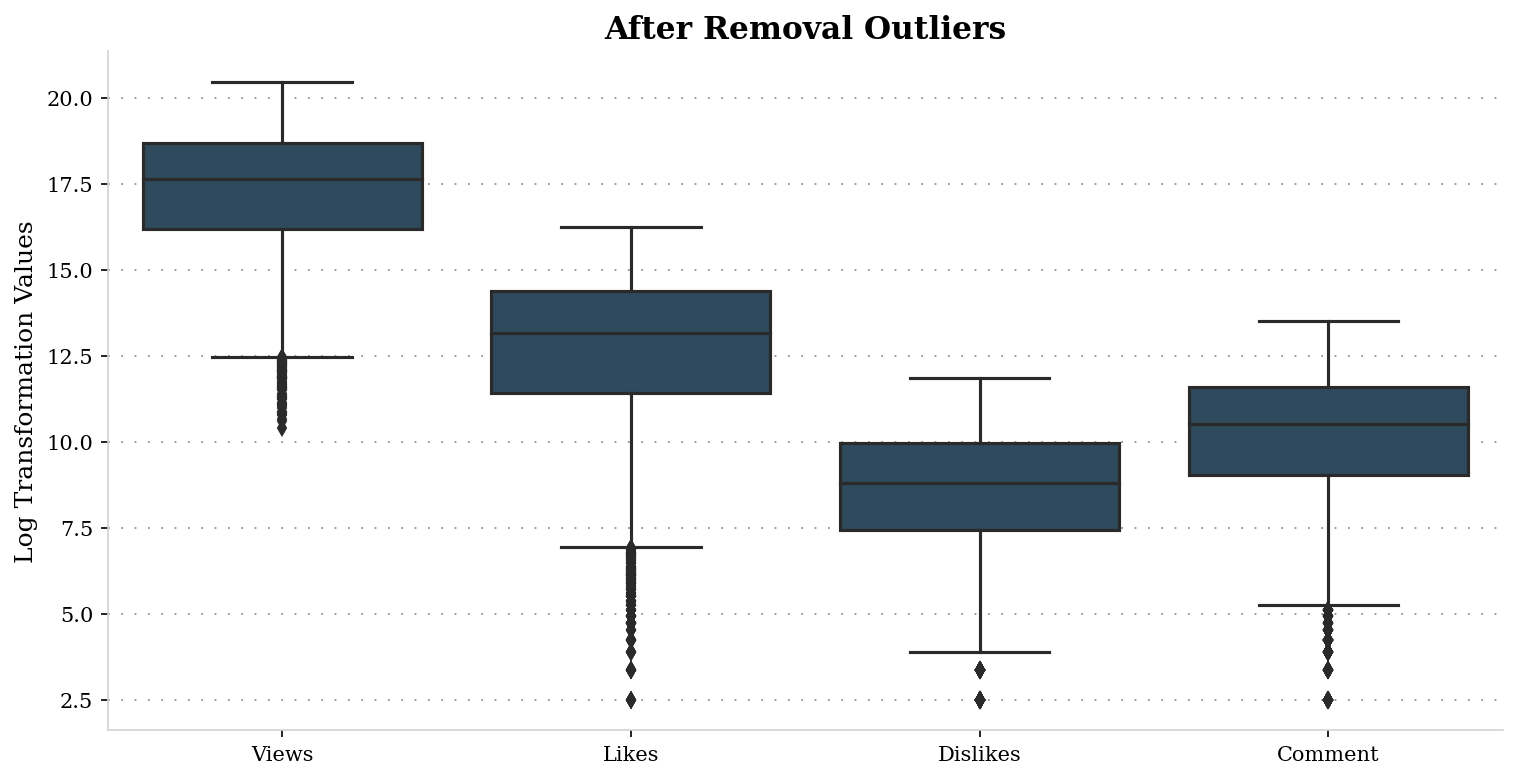

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12, 6), dpi=150)

color_map = ['#284B63' for _ in range(4)]

sns.boxplot(data=cluster_clean[cls_log], palette=color_map)

for s in ['top', 'right']:
  ax.spines[s].set_visible(False)

for t in ['left', 'bottom']:
    ax.spines[t].set_color('lightgray')

ax.grid(which='major', axis='y', zorder=0, color='gray', linestyle=':', dashes=(1,7))

xticklabels = ['Views','Likes','Dislikes','Comment']
yticklabels = np.arange(0, 20.5, 2.5)
ax.set_xticklabels(xticklabels, fontfamily='serif', rotation=0)
ax.set_yticklabels(yticklabels, fontfamily='serif', rotation=0)
ax.set_axisbelow(True)

plt.ylabel('Log Transformation Values', fontsize=12, fontweight='light', fontfamily='serif')
plt.xlabel('')

plt.title('After Removal Outliers', fontsize=15, fontweight='bold', fontfamily='serif')

#plt.savefig('After Removal Outliers.png', bbox_inches='tight')
plt.show()

## **II. Clustering**

In [ ]:
X = cluster_clean[cls]

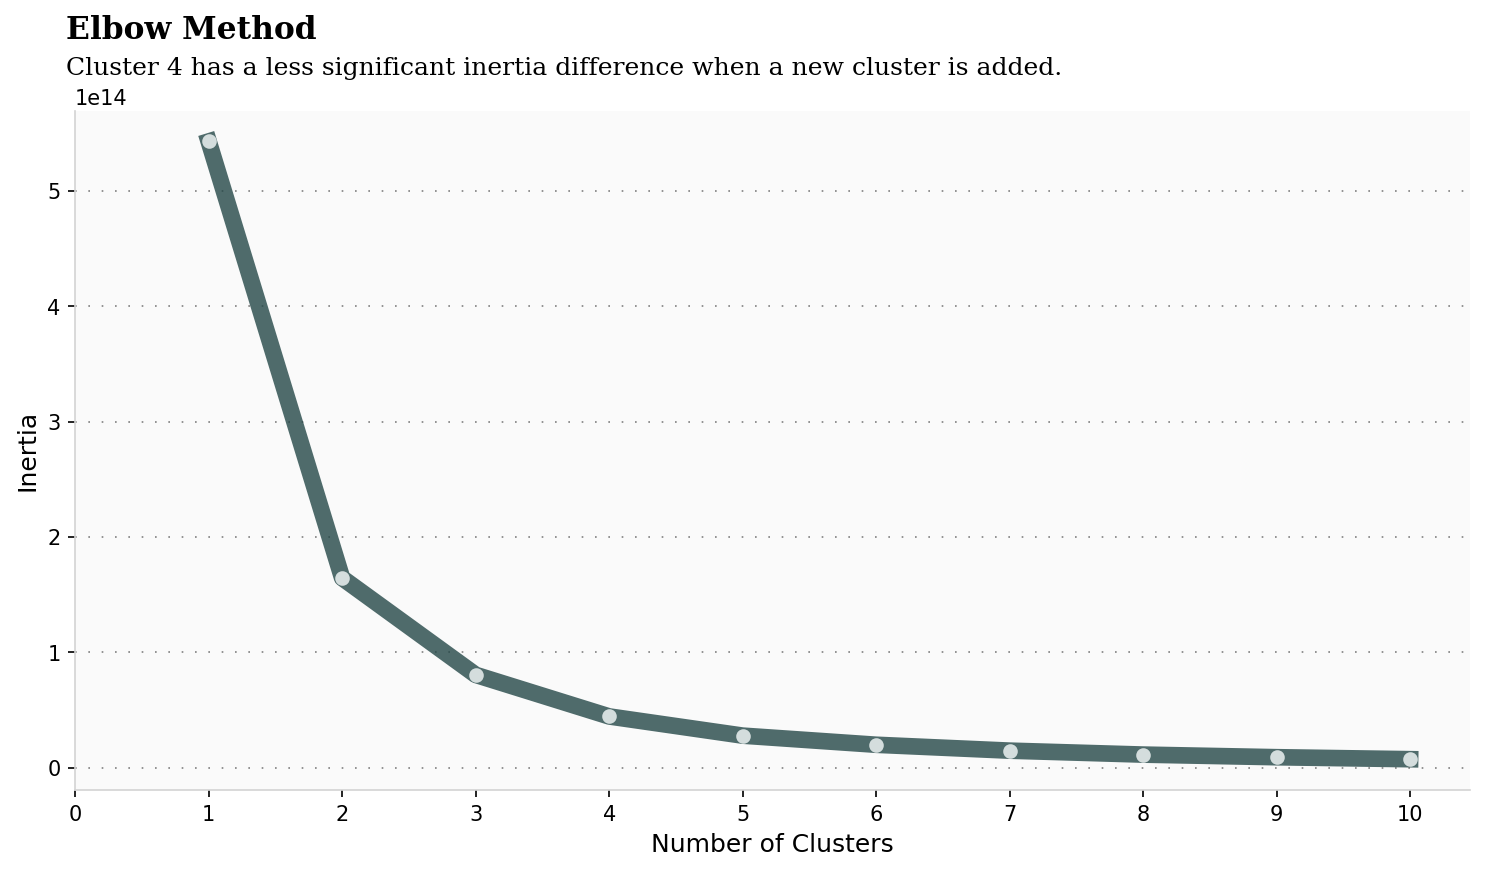

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12, 6), dpi=150)

inertias =[]
for c in range(1,11):
    kmeans = KMeans(n_clusters=c,init='k-means++',max_iter=300,n_init=10,random_state=0).fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11),inertias, '-' , color='#244747',alpha = 0.8,linewidth=8)
plt.plot(range(1,11),inertias, 'o',linewidth=20,color='#d4dddd')    

plt.xlabel('Number of Clusters',fontsize=12) , plt.ylabel('Inertia',fontsize=12)
ax.xaxis.set_ticks(np.arange(0,11,1))

fig.text(0.12,0.96,'Elbow Method', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.12,0.92,'Cluster 4 has a less significant inertia difference when a new cluster is added.',fontfamily='serif',fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_color('lightgray')
ax.spines['bottom'].set_color('lightgray')

ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_color('lightgray')
ax.spines['bottom'].set_color('lightgray')
ax.grid(which='major', axis='y', zorder=0, color='gray', linestyle=':', dashes=(1,7))

ax.set_facecolor('#fafafa')

#plt.savefig('Elbow Method.png', bbox_inches='tight')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0) 
y = kmeans.fit_predict(X)
cluster_clean['cluster'] = y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
cluster_clean.groupby('cluster').mean().sort_values('cluster').reset_index()

cluster         views         likes    dislikes  comment_count  \
0        0  1.311680e+06  27755.853333  814.177778    2508.977778   
1        1  3.536247e+05  13103.514388  388.475540    1460.770504   
2        2  7.486628e+05  22517.210445  606.500768    2252.858679   
3        3  8.187838e+04   3433.423559  116.998926     445.630147   

   comments_disabled  ratings_disabled  likes_log  views_log  dislikes_log  \
0           0.013333          0.004444        NaN  14.075217           NaN   
1           0.005755          0.000719        NaN  12.739970           NaN   
2           0.023041          0.007680        NaN  13.511286           NaN   
3           0.018618          0.006087        NaN  10.802752           NaN   

   comment_log  
0          NaN  
1          NaN  
2          NaN  
3          NaN

In [ ]:
cluster_clean['cluster_label'] = cluster_clean['cluster'].apply(lambda x: 'most viewed' if x == 0 else 
                                               'less viewed' if x == 1 else
                                               'many viewed' if x == 2 else 'least viewed')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
cluster_clean.groupby('cluster_label').mean().sort_values('views', ascending=False).reset_index()

cluster_label         views         likes    dislikes  comment_count  \
0   most viewed  1.311680e+06  27755.853333  814.177778    2508.977778   
1   many viewed  7.486628e+05  22517.210445  606.500768    2252.858679   
2   less viewed  3.536247e+05  13103.514388  388.475540    1460.770504   
3  least viewed  8.187838e+04   3433.423559  116.998926     445.630147   

   comments_disabled  ratings_disabled  likes_log  views_log  dislikes_log  \
0           0.013333          0.004444        NaN  14.075217           NaN   
1           0.023041          0.007680        NaN  13.511286           NaN   
2           0.005755          0.000719        NaN  12.739970           NaN   
3           0.018618          0.006087        NaN  10.802752           NaN   

   comment_log  cluster  
0          NaN      0.0  
1          NaN      2.0  
2          NaN      1.0  
3          NaN      3.0

### **1. Most Viewed**

In [ ]:
cluster_most_viewed = cluster_clean[cluster_clean['cluster_label']=='most viewed']
most_viewed = cluster_most_viewed.groupby(['category_title'])[['views','likes','dislikes','comment_count']].mean().sort_values('views', ascending=False).reset_index()

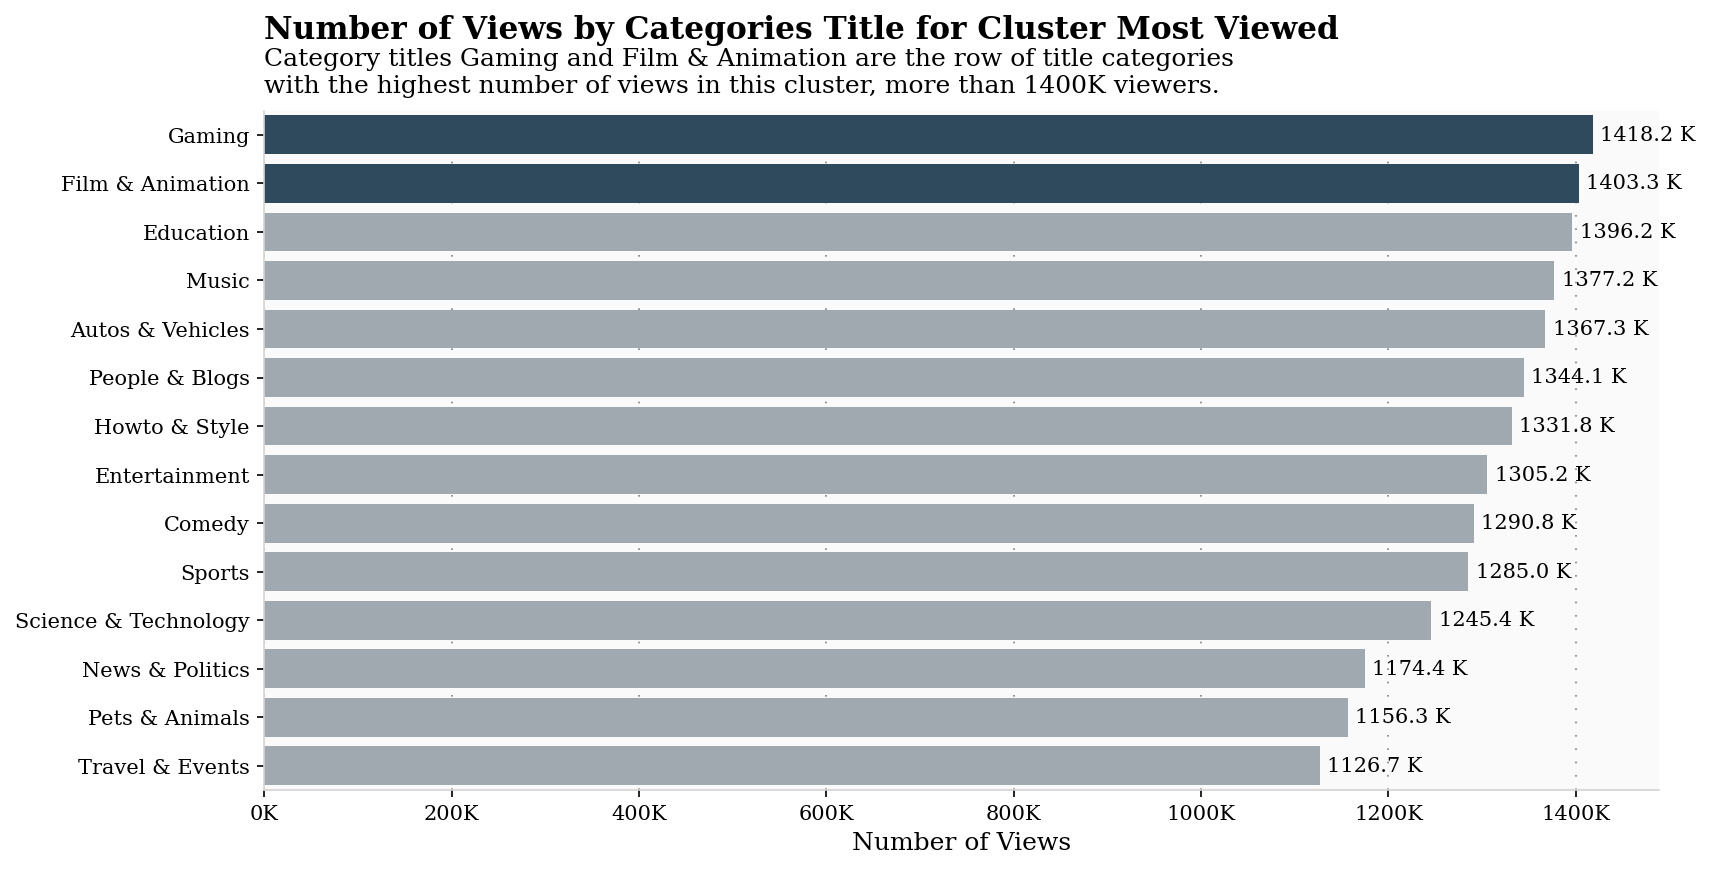

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12, 6), dpi=150)

color_map = ['#9DA9B1' for _ in range(16)]
for cm in range(2):
  color_map[cm] = '#284B63' 

sns.barplot(x='views', y='category_title', data=most_viewed, palette=color_map)

for i, j in most_viewed.iterrows():
  ax.annotate(f"{round(j['views']/1000, 1)} K", xy=(j['views']+59000, i), va = 'center', ha='center',fontweight='light', fontfamily='serif')

for s in ['top', 'right']:
  ax.spines[s].set_visible(False)

for t in ['left', 'bottom']:
    ax.spines[t].set_color('lightgray')

ax.grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,7))

xticklabels = ['0K','200K','400K','600K','800K','1000K','1200K','1400K']
yticklabels = most_viewed['category_title']
ax.set_xticklabels(xticklabels, fontfamily='serif', rotation=0)
ax.set_yticklabels(yticklabels, fontfamily='serif', rotation=0)
ax.set_axisbelow(True)

plt.xlabel('Number of Views', fontsize=12, fontweight='light', fontfamily='serif')
plt.ylabel('')

ax.set_facecolor('#fafafa')

fig.text(.125, .96, 'Number of Views by Categories Title for Cluster Most Viewed', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(.125, .9, 'Category titles Gaming and Film & Animation are the row of title categories\nwith the highest number of views in this cluster, more than 1400K viewers.', fontsize=12, fontweight='light', fontfamily='serif')

#plt.savefig('Number of Views by Categories Title for Cluster Most Viewed.png', bbox_inches='tight')
plt.show()

In [ ]:
most_viewed_words = cluster_most_viewed[cluster_most_viewed['category_title'].isin(['Gaming','Film & Animation'])]

cluster_most_viewed_words = list(most_viewed_words['video_title'].apply(lambda x: x.split(' ')))
cluster_most_viewed_words = [x for y in cluster_most_viewed_words for x in y]
pd.DataFrame(Counter(cluster_most_viewed_words).most_common(5))

0   1
0         -  11
1         |  10
2   Trailer   8
3  Trailers   8
4  Official   7

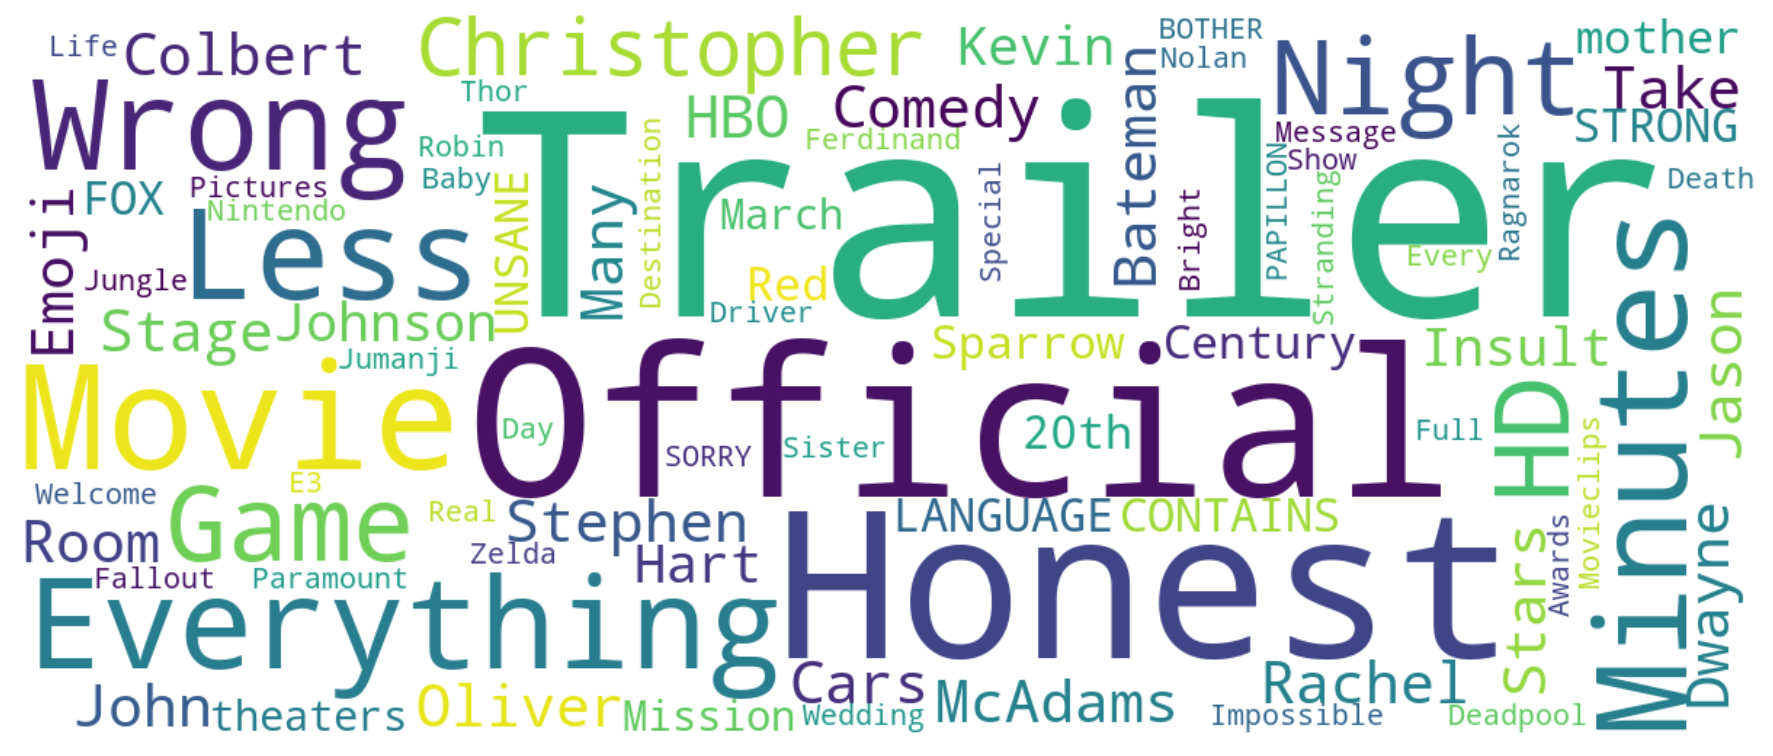

In [ ]:
wc = WordCloud(width=1200, height=500, collocations=False, background_color='white', colormap=None).generate(' '.join(cluster_most_viewed_words))
plt.figure(figsize=(15,10), dpi=150)
plt.imshow(wc, interpolation='bilinear')
plt.axis(False)

#plt.savefig('WordCloud_Most_Title.png', bbox_inches='tight')
plt.show()

In [ ]:
cluster_most_viewed_tags = list(most_viewed_words['tags'].apply(lambda x: x.split('|')))
cluster_most_viewed_tags = [x for y in cluster_most_viewed_tags for x in y]
pd.DataFrame(Counter(cluster_most_viewed_tags).most_common(5))

0  1
0  "honest trailers"  7
1   "honest trailer"  7
2   "screen junkies"  6
3      screenjunkies  5
4          "Trailer"  3

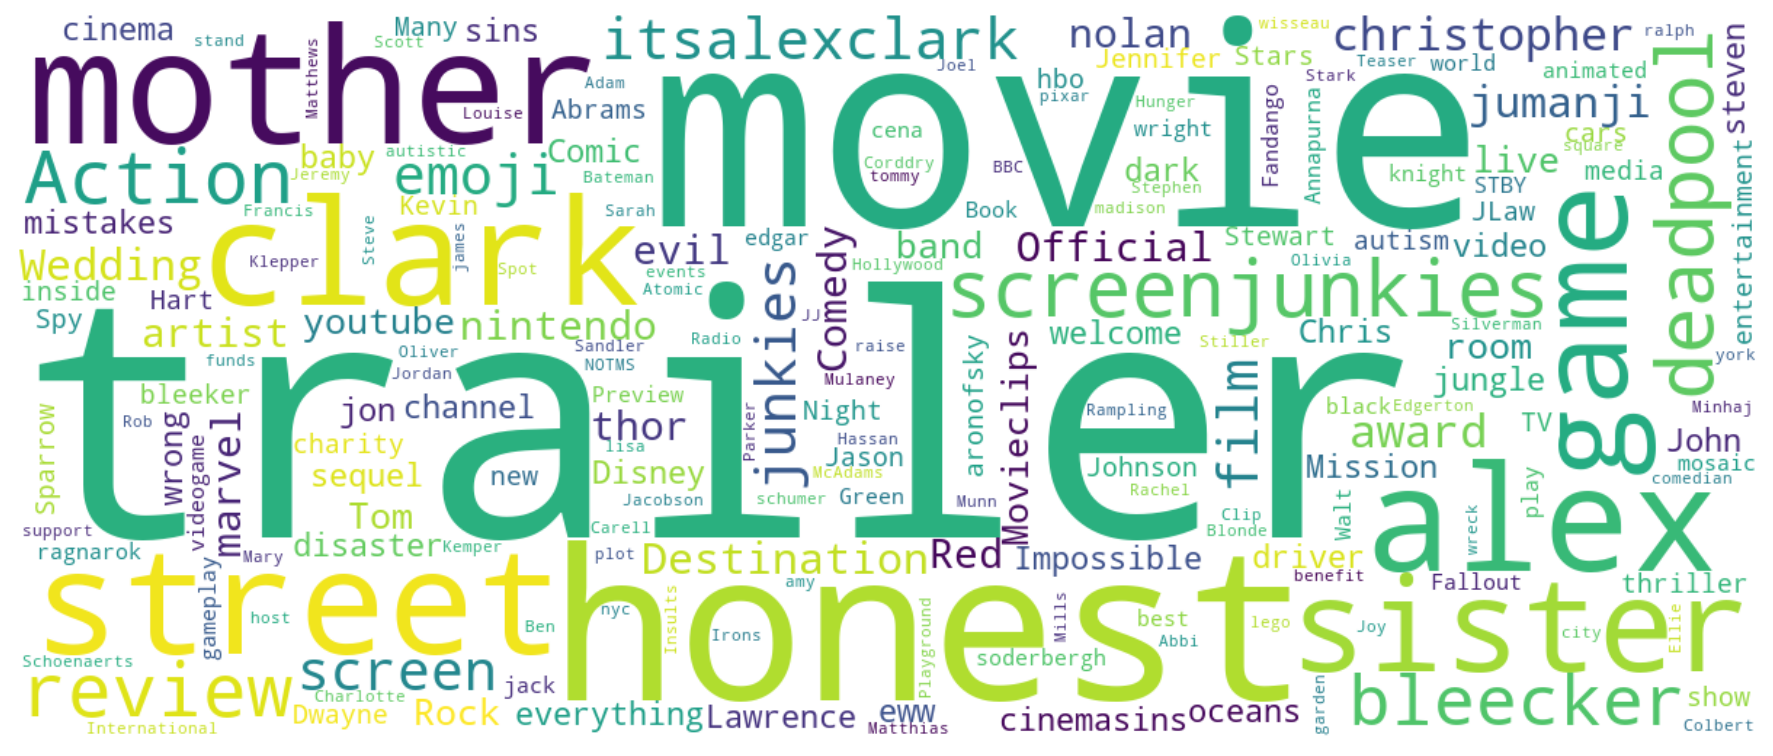

In [ ]:
wc = WordCloud(width=1200, height=500, collocations=False, background_color='white', colormap=None).generate(' '.join(cluster_most_viewed_tags))
plt.figure(figsize=(15,10), dpi=150)
plt.imshow(wc, interpolation='bilinear')
plt.axis(False)

#plt.savefig('WordCloud_Most_Tags.png', bbox_inches='tight')
plt.show()

### **2. Many Viewed**

In [ ]:
cluster_many_viewed = cluster_clean[cluster_clean['cluster_label']=='many viewed']
many_viewed = cluster_many_viewed.groupby(['category_title'])[['views','likes','dislikes','comment_count']].mean().sort_values('views', ascending=False).reset_index()

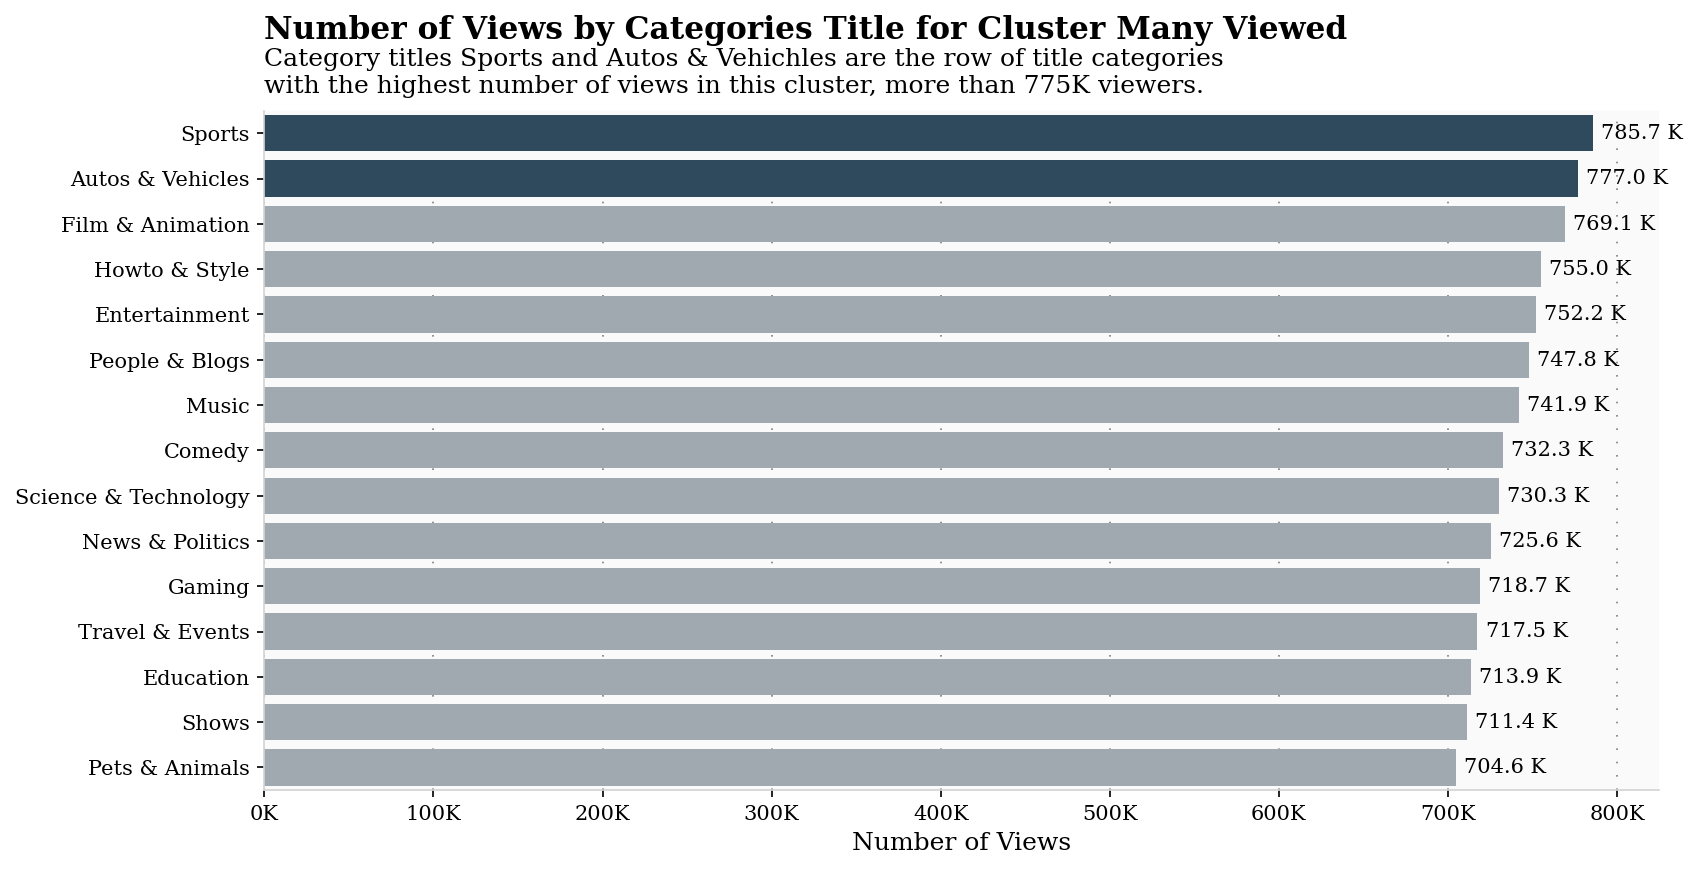

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12, 6), dpi=150)

color_map = ['#9DA9B1' for _ in range(16)]
for cm in range(2):
  color_map[cm] = '#284B63' 

sns.barplot(x='views', y='category_title', data=many_viewed, palette=color_map)

for i, j in many_viewed.iterrows():
  ax.annotate(f"{round(j['views']/1000, 1)} K", xy=(j['views']+29000, i), va = 'center', ha='center',fontweight='light', fontfamily='serif')

for s in ['top', 'right']:
  ax.spines[s].set_visible(False)

for t in ['left', 'bottom']:
    ax.spines[t].set_color('lightgray')

ax.grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,7))

xticklabels = ['0K','100K','200K','300K','400K','500K','600K','700K','800K']
yticklabels = many_viewed['category_title']
ax.set_xticklabels(xticklabels, fontfamily='serif', rotation=0)
ax.set_yticklabels(yticklabels, fontfamily='serif', rotation=0)
ax.set_axisbelow(True)

plt.xlabel('Number of Views', fontsize=12, fontweight='light', fontfamily='serif')
plt.ylabel('')

fig.text(.125, .96, 'Number of Views by Categories Title for Cluster Many Viewed', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(.125, .9, 'Category titles Sports and Autos & Vehichles are the row of title categories\nwith the highest number of views in this cluster, more than 775K viewers.', fontsize=12, fontweight='light', fontfamily='serif')

ax.set_facecolor('#fafafa')

#plt.savefig('Number of Views by Categories Title for Cluster Many Viewed.png', bbox_inches='tight')
plt.show()

In [ ]:
many_viewed_words = cluster_many_viewed[cluster_many_viewed['category_title'].isin(['Sports','Autos & Vehicles'])]

cluster_many_viewed_words = list(many_viewed_words['video_title'].apply(lambda x: x.split(' ')))
cluster_many_viewed_words = [x for y in cluster_many_viewed_words for x in y]
pd.DataFrame(Counter(cluster_many_viewed_words).most_common(5))

0   1
0        |  60
1     ESPN  20
2      the  16
3      vs.  15
4  Stephen  15

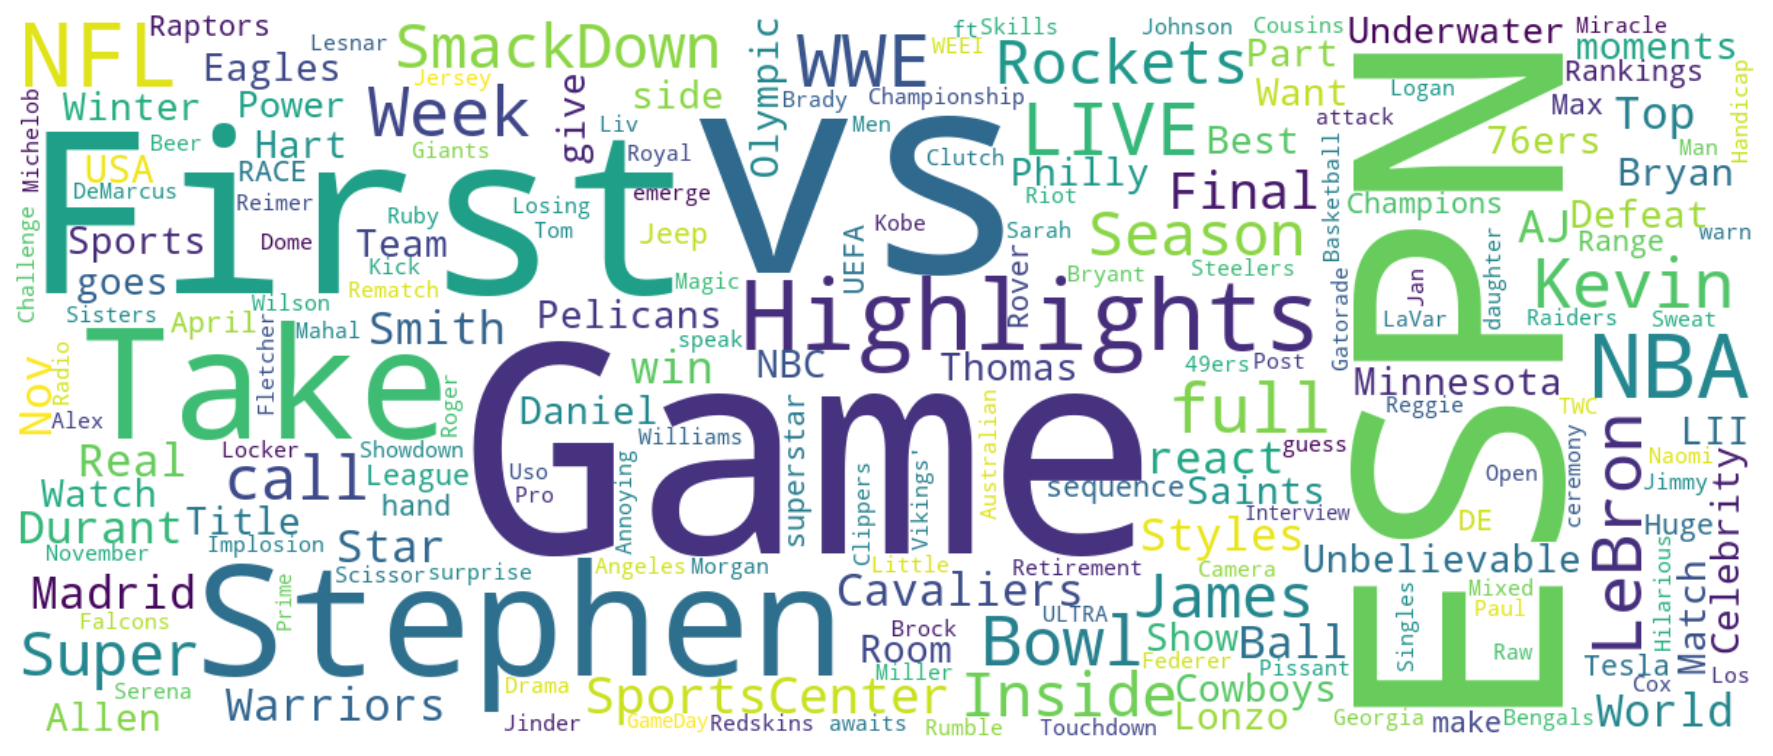

In [ ]:
wc = WordCloud(width=1200, height=500, collocations=False, background_color='white', colormap=None).generate(' '.join(cluster_many_viewed_words))
plt.figure(figsize=(15,10), dpi=150)
plt.imshow(wc, interpolation='bilinear')
plt.axis(False)

#plt.savefig('WordCloud_Many.png', bbox_inches='tight')
plt.show()

In [ ]:
cluster_many_viewed_tags = list(many_viewed_words['tags'].apply(lambda x: x.split('|')))
cluster_many_viewed_tags = [x for y in cluster_many_viewed_tags for x in y]
pd.DataFrame(Counter(cluster_many_viewed_tags).most_common(5))

0   1
0        "espn live"  18
1               espn  17
2        "stephen a"  16
3  "stephen a smith"  15
4             "game"  14

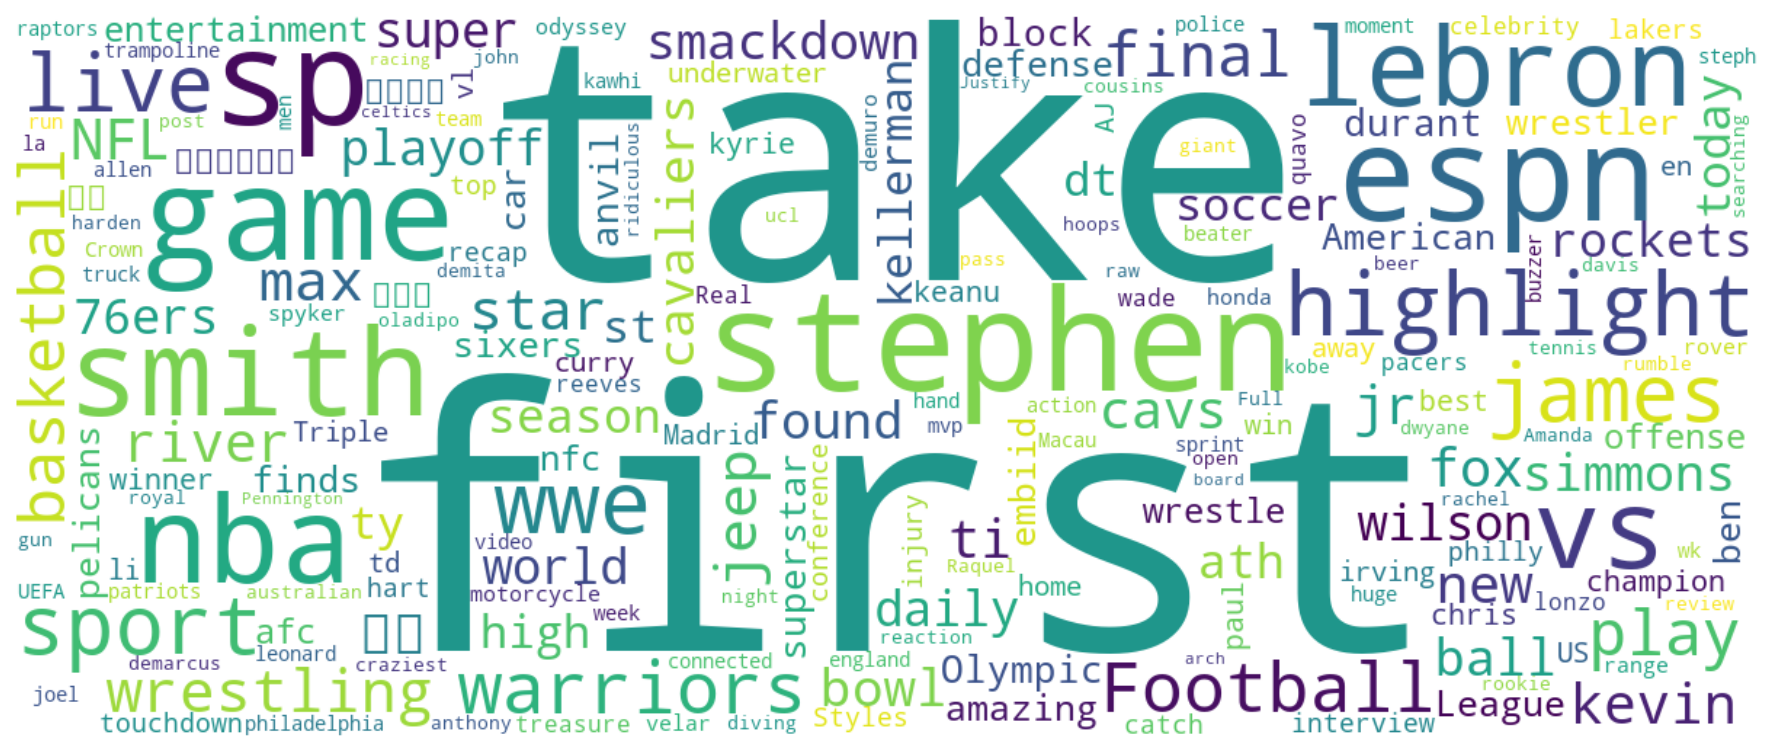

In [ ]:
wc = WordCloud(width=1200, height=500, collocations=False, background_color='white', colormap=None).generate(' '.join(cluster_many_viewed_tags))
plt.figure(figsize=(15,10), dpi=150)
plt.imshow(wc, interpolation='bilinear')
plt.axis(False)

#plt.savefig('WordCloud_Many_Tags.png', bbox_inches='tight')
plt.show()

### **3. Less Viewed**

In [ ]:
cluster_less_viewed = cluster_clean[cluster_clean['cluster_label']=='less viewed']
less_viewed = cluster_less_viewed.groupby(['category_title'])[['views','likes','dislikes','comment_count']].mean().sort_values('views', ascending=False).reset_index()

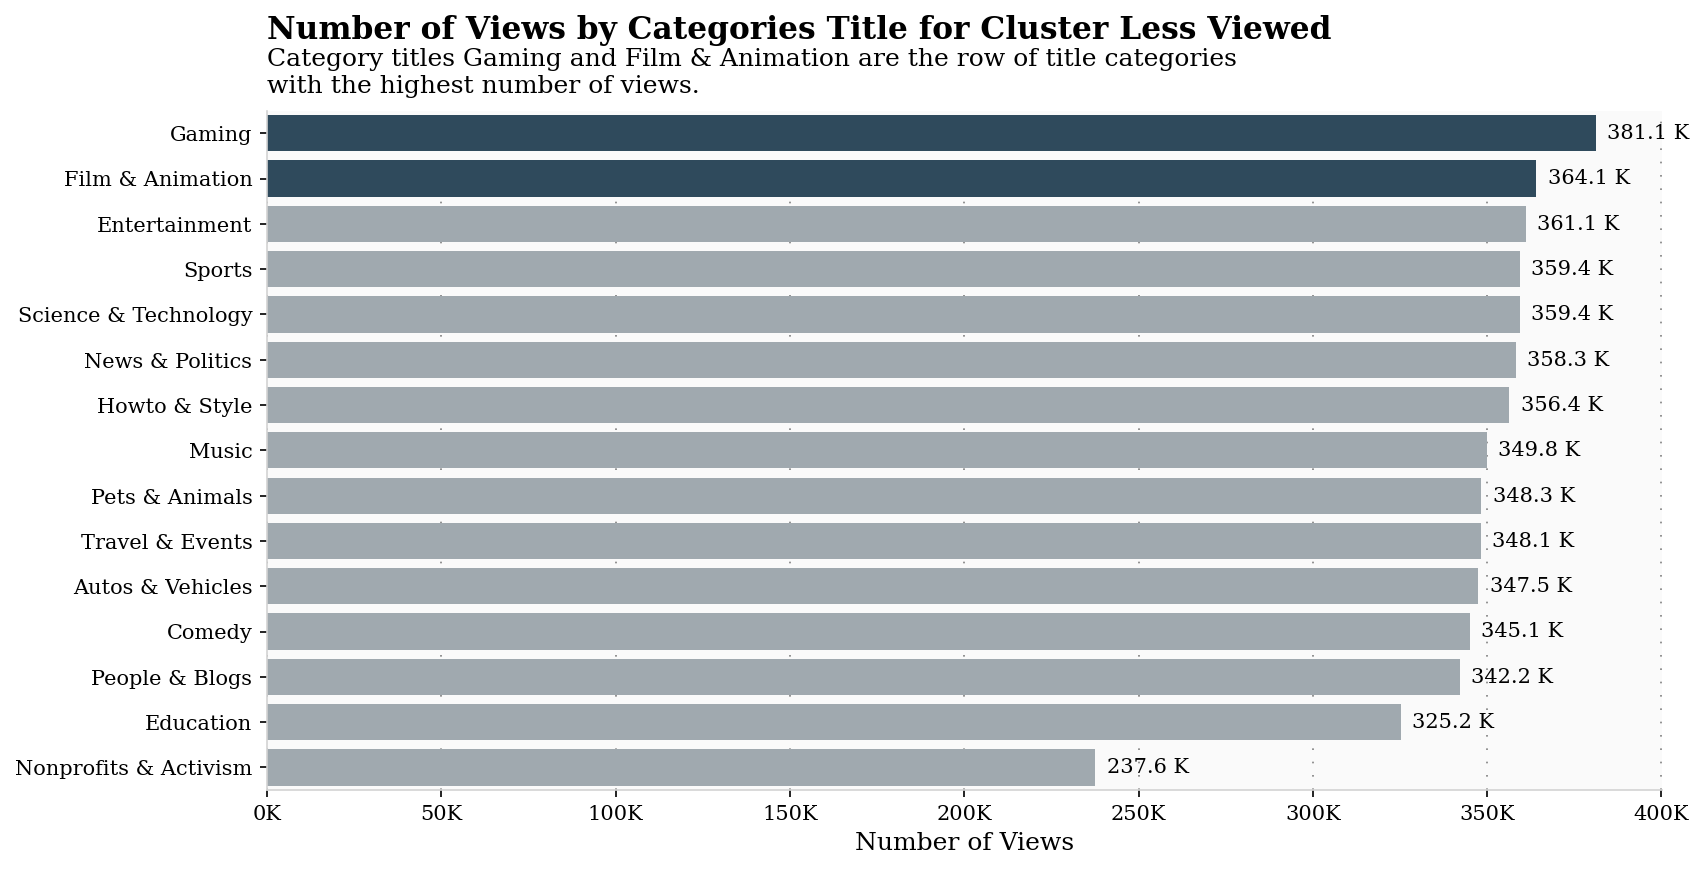

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12, 6), dpi=150)

color_map = ['#9DA9B1' for _ in range(16)]
for cm in range(2):
  color_map[cm] = '#284B63' 

sns.barplot(x='views', y='category_title', data=less_viewed, palette=color_map)

for i, j in less_viewed.iterrows():
  ax.annotate(f"{round(j['views']/1000, 1)} K", xy=(j['views']+15000, i), va = 'center', ha='center',fontweight='light', fontfamily='serif')

for s in ['top', 'right']:
  ax.spines[s].set_visible(False)

for t in ['left', 'bottom']:
    ax.spines[t].set_color('lightgray')

ax.grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,7))

xticklabels = ['0K','50K','100K','150K','200K','250K','300K','350K','400K']
yticklabels = less_viewed['category_title']
ax.set_xticklabels(xticklabels, fontfamily='serif', rotation=0)
ax.set_yticklabels(yticklabels, fontfamily='serif', rotation=0)
ax.set_axisbelow(True)

plt.xlabel('Number of Views', fontsize=12, fontweight='light', fontfamily='serif')
plt.ylabel('')

fig.text(.125, .96, 'Number of Views by Categories Title for Cluster Less Viewed', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(.125, .9, 'Category titles Gaming and Film & Animation are the row of title categories\nwith the highest number of views.', fontsize=12, fontweight='light', fontfamily='serif')

ax.set_facecolor('#fafafa')

#plt.savefig('Number of Views by Categories Title for Cluster Less Viewed.png', bbox_inches='tight')
plt.show()

### **4. Least Viewed**

In [ ]:
cluster_least_viewed = cluster_clean[cluster_clean['cluster_label']=='least viewed']
least_viewed = cluster_least_viewed.groupby(['category_title'])[['views','likes','dislikes','comment_count']].mean().sort_values('views', ascending=False).reset_index()

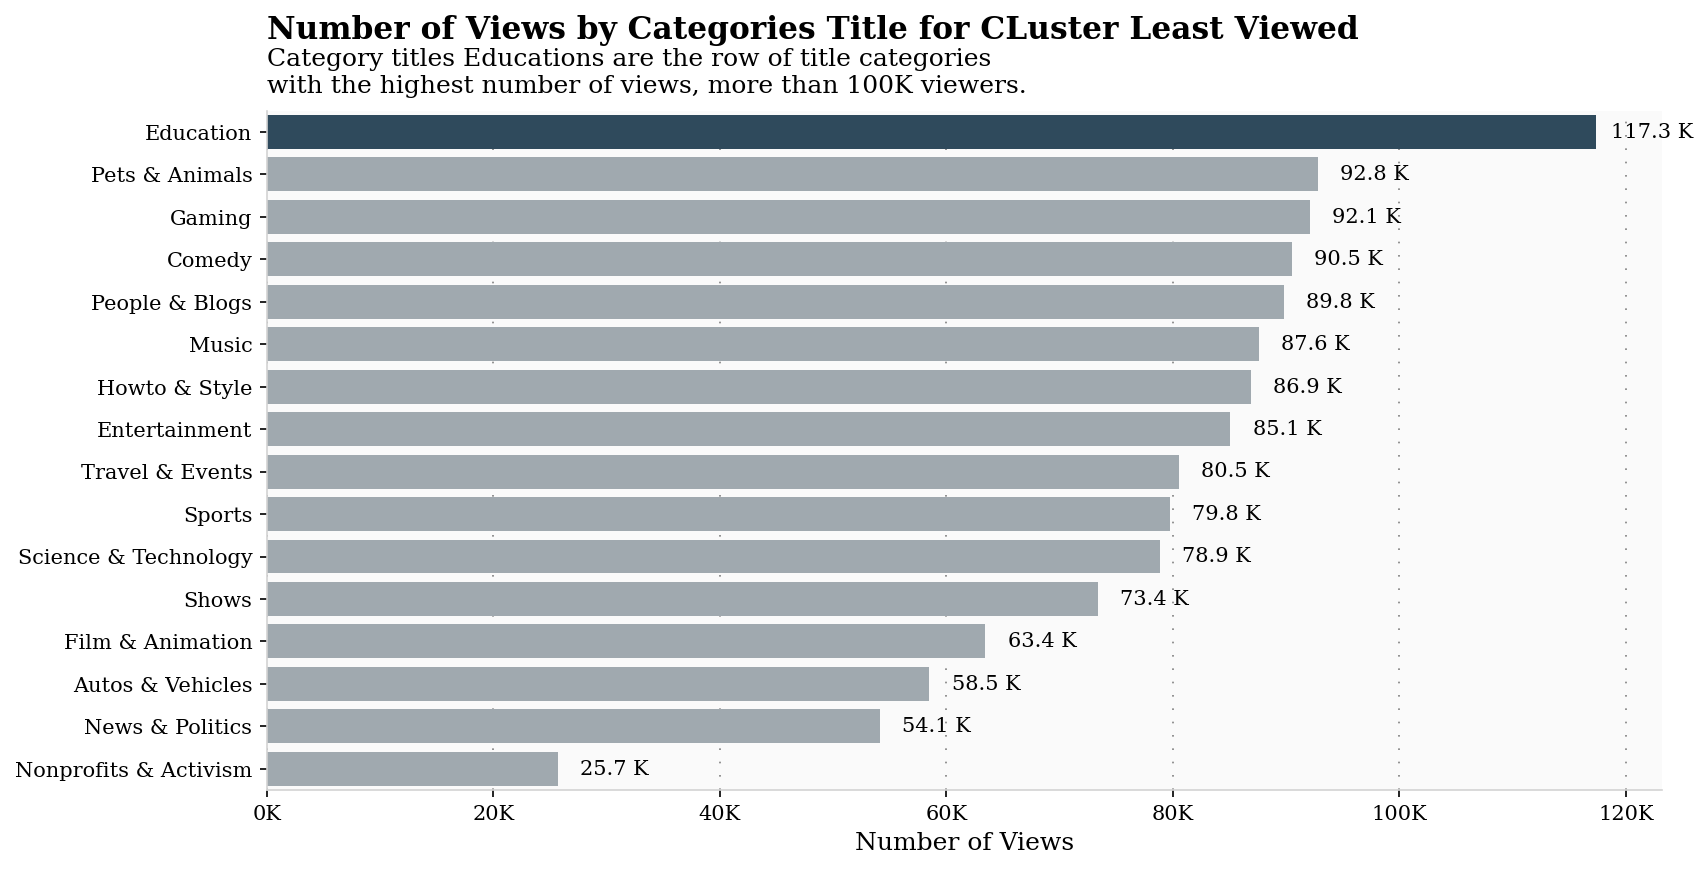

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12, 6), dpi=150)

color_map = ['#9DA9B1' for _ in range(16)]
for cm in range(1):
  color_map[cm] = '#284B63' 

sns.barplot(x='views', y='category_title', data=least_viewed, palette=color_map)

for i, j in least_viewed.iterrows():
  ax.annotate(f"{round(j['views']/1000, 1)} K", xy=(j['views']+5000, i), va = 'center', ha='center',fontweight='light', fontfamily='serif')

for s in ['top', 'right']:
  ax.spines[s].set_visible(False)

for t in ['left', 'bottom']:
    ax.spines[t].set_color('lightgray')

ax.grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,7))

xticklabels = ['0K','20K','40K','60K','80K','100K','120K']
yticklabels = least_viewed['category_title']
ax.set_xticklabels(xticklabels, fontfamily='serif', rotation=0)
ax.set_yticklabels(yticklabels, fontfamily='serif', rotation=0)
ax.set_axisbelow(True)

plt.xlabel('Number of Views', fontsize=12, fontweight='light', fontfamily='serif')
plt.ylabel('')

fig.text(.125, .96, 'Number of Views by Categories Title for CLuster Least Viewed', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(.125, .9, 'Category titles Educations are the row of title categories\nwith the highest number of views, more than 100K viewers.', fontsize=12, fontweight='light', fontfamily='serif')

ax.set_facecolor('#fafafa')

#plt.savefig('Number of Views by Categories Title for CLuster Least Viewed.png', bbox_inches='tight')
plt.show()

In [ ]:
least_viewed_words = cluster_least_viewed[cluster_least_viewed['category_title'].isin(['Education'])]

cluster_least_viewed_words = list(least_viewed_words['video_title'].apply(lambda x: x.split(' ')))
cluster_least_viewed_words = [x for y in cluster_least_viewed_words for x in y]
pd.DataFrame(Counter(cluster_least_viewed_words).most_common(5))

0   1
0    -  23
1  The  22
2  How  19
3   of  16
4    a  15

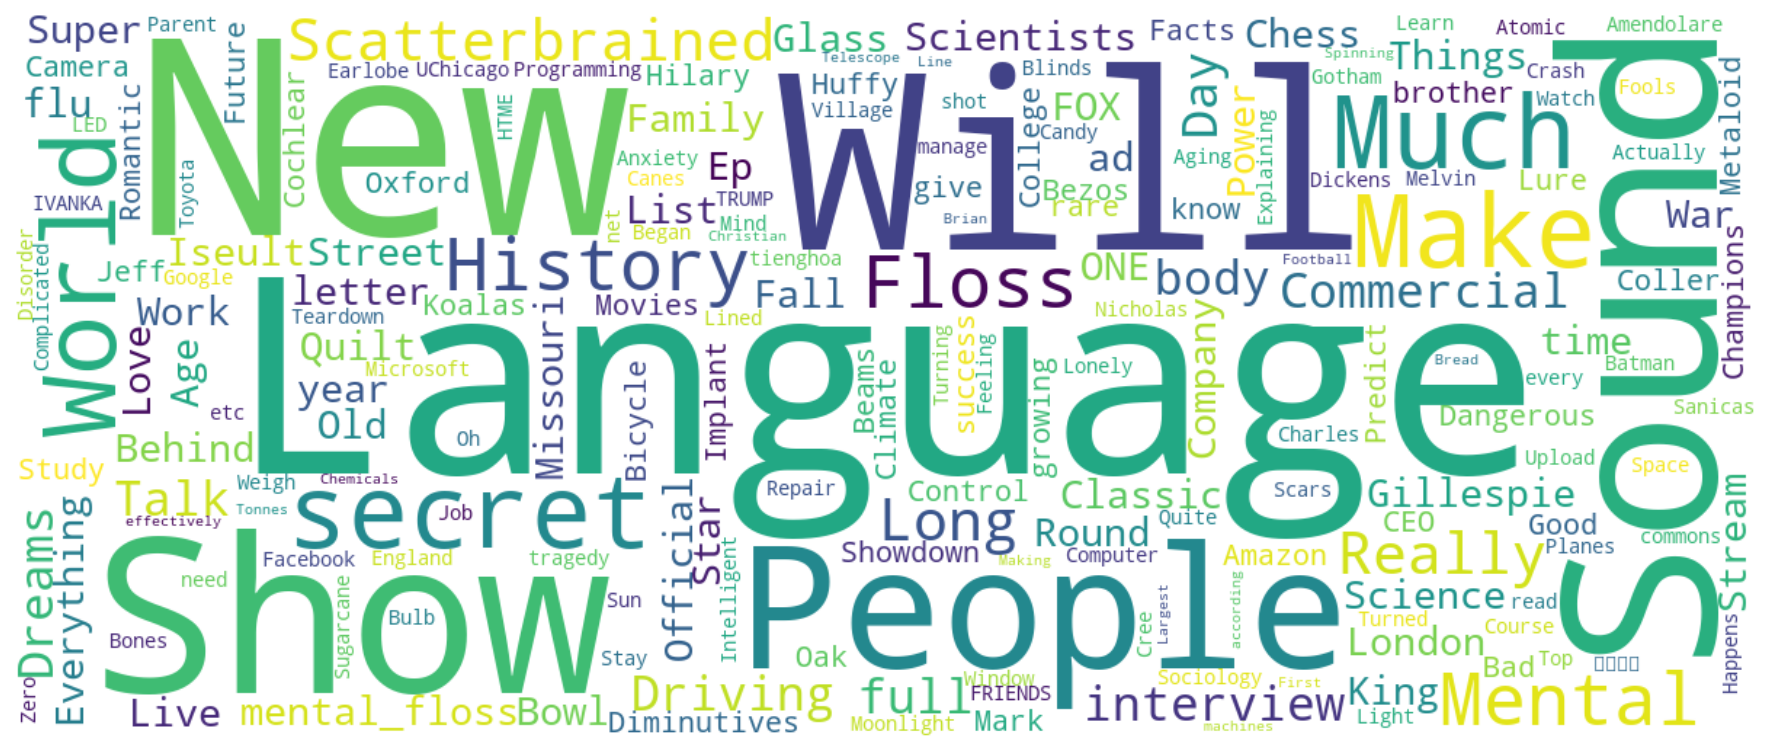

In [ ]:
wc = WordCloud(width=1200, height=500, collocations=False, background_color='white', colormap=None).generate(' '.join(cluster_least_viewed_words))
plt.figure(figsize=(15,10), dpi=150)
plt.imshow(wc, interpolation='bilinear')
plt.axis(False)

#plt.savefig('WordCloud_Least_Title.png', bbox_inches='tight')
plt.show()

In [ ]:
cluster_least_viewed_tags = list(least_viewed_words['tags'].apply(lambda x: x.split('|')))
cluster_least_viewed_tags = [x for y in cluster_least_viewed_tags for x in y]
pd.DataFrame(Counter(cluster_least_viewed_tags).most_common(5))

0   1
0  "education"  33
1    "science"  31
2      "learn"  20
3      SciShow  18
4       "Hank"  18

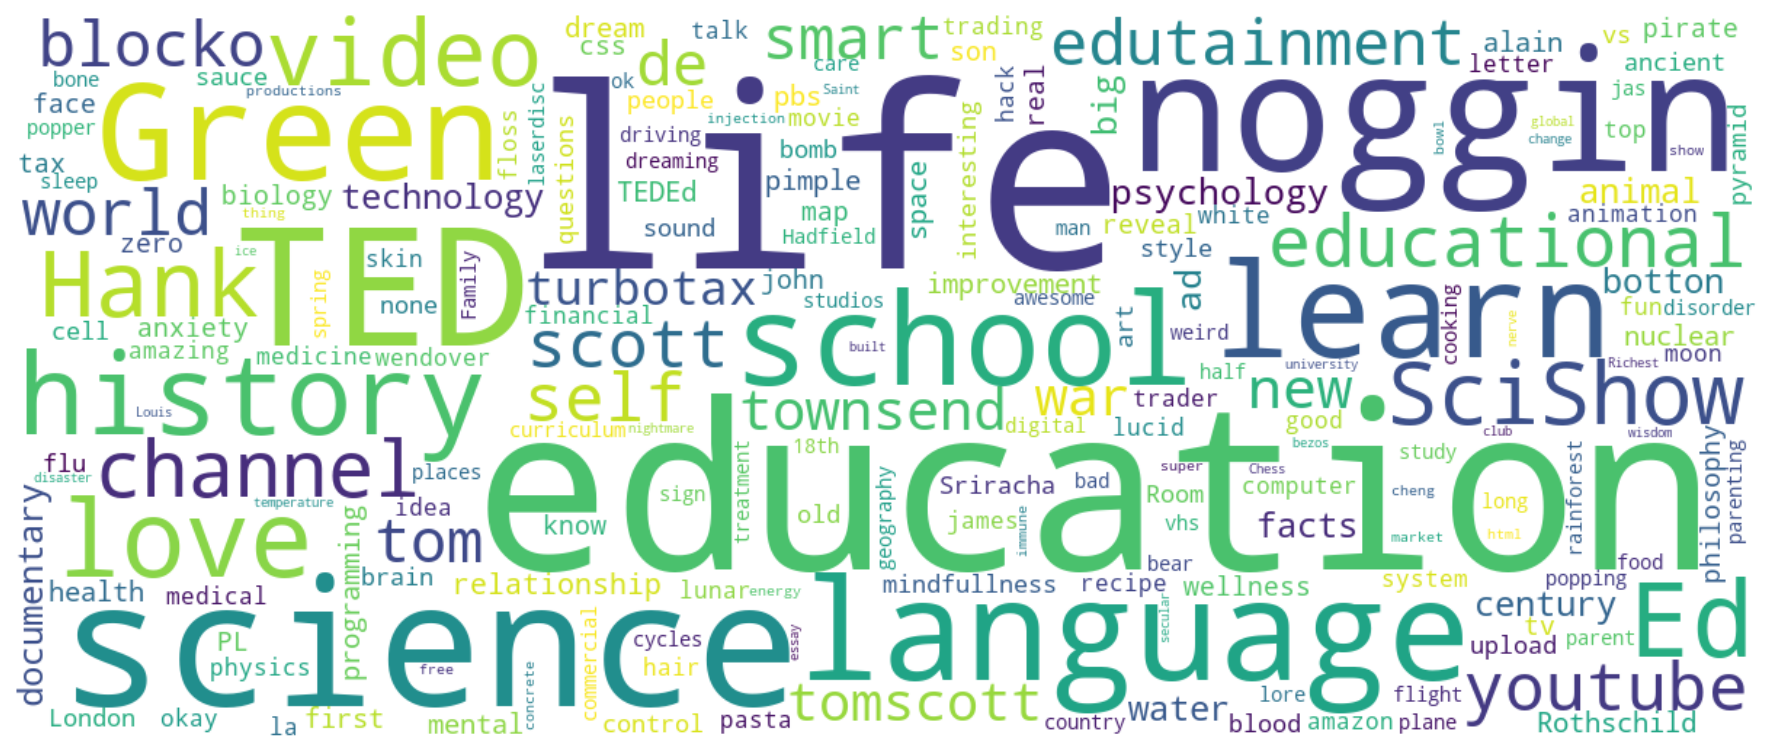

In [ ]:
wc = WordCloud(width=1200, height=500, collocations=False, background_color='white', colormap=None).generate(' '.join(cluster_least_viewed_tags))
plt.figure(figsize=(15,10), dpi=150)
plt.imshow(wc, interpolation='bilinear')
plt.axis(False)

#plt.savefig('WordCloud_Least_Tags.png', bbox_inches='tight')
plt.show()

# **D. Summary**



*   The **top three title categories with the most trending videos** are **Entertainment**, **Music**, and **Howto & Style**.
*   **Music** title category has **the second highest** number of views with **more than 1 million views, the third highest Views** - Likes Ratio with **more than 3.5%, the second highest Views - Comments Ratio** with **more than 3.5%, and quite low Views-Dislikes Ratio** with **less than 0.09%**. Also, **became one of the categories with the fastest time to become trending**.
*   **The beginning and end of the year are the most common months for uploading videos**. By **uploading on weekdays** and **between around 15.00 o’clock** and **around 17.00 o’clock**.
*   **The number of characters** in the **video title** ranges from **30 to 60 at most**, with the **symbol *|* or - as a separator** and in general **words like Official, Video, Trailer, and Live are used the most**.

For Clusters:


*   **Cluster Most Viewed - Gaming** and **Film & Animation** Title Category with **Tags Honest Trailer** and **Screen Junkies**.
*   **Cluster Many Viewed - Sports** and **Autos & Vehicles** Title Category with **Tags ESPN** and **Stephen A**.
*   **Cluster Least Viewed - Educational** Title Category with **Titles that depend on the content** and **contain question words like What, Why, When**, etc.
*   For each cluster, the **video title uses** the **-** or **| symbols for the separator**.









